In [1]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading the dataset
data = pd.read_csv('worldvalues-data.csv', dtype = object, na_values = ['-1', '-2', '-3', '-4', '-5'])

<strong> Note: </strong> <br>
All negative answers are assumed to be null values.

In [3]:
data.head()

,V1,V2,V2A,V3,V4,V5,V6,V7,V8,V9,...,VOICE,WEIGHT4B,S001,S007,S018,S019,S021,S024,S025,COW
0,2010-2013,Algeria,Algeria,1,1,1,1,No answer,1,1,...,.25,1,WVS,13761,.83333331,1.25,1206212014,Algeria (6),Algeria (2014),ALG Algeria
1,2010-2013,Algeria,Algeria,2,1,2,3,4,2,2,...,.33000001,1,WVS,13762,.83333331,1.25,1206212014,Algeria (6),Algeria (2014),ALG Algeria
2,2010-2013,Algeria,Algeria,3,1,3,2,4,2,1,...,.16500001,1,WVS,13763,.83333331,1.25,1206212014,Algeria (6),Algeria (2014),ALG Algeria
3,2010-2013,Algeria,Algeria,4,1,1,3,4,3,1,...,0,1,WVS,13764,.83333331,1.25,1206212014,Algeria (6),Algeria (2014),ALG Algeria
4,2010-2013,Algeria,Algeria,5,1,1,1,2,1,1,...,.33000001,1,WVS,13765,.83333331,1.25,1206212014,Algeria (6),Algeria (2014),ALG Algeria


<strong> Note: </strong> <br>
We have a dataset with 440 variables. For more information about the variables, look at world dictionary pdf file.

In [4]:
#making a copy of dataset
df = data.copy()

<strong> Note: </strong> <br>
Since we don't want to change anything in our original dataset. We make a copy of it. In this case, if anything went wrong we can always go back and recover our data to its original shape. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89565 entries, 0 to 89564
Columns: 440 entries, V1 to COW
dtypes: object(440)
memory usage: 300.7+ MB


In [6]:
df.describe()

,V1,V2,V2A,V3,V4,V5,V6,V7,V8,V9,...,VOICE,WEIGHT4B,S001,S007,S018,S019,S021,S024,S025,COW
count,89565,89565,89565,89565,89565,89565,89565,89565,89565,89565,...,89565,89565,89565,15875,89565,89565,80544,89565,89565,89565
unique,1,60,61,10275,7,7,7,8,8,7,...,19,2,1,15001,5218,5218,2,60,60,60
top,2010-2013,India,India,1,1,1,2,3,1,1,...,0,1,WVS,25041,.83333331,1.25,.z,India (6),India (2012),IND India
freq,89565,4078,4078,319,82057,41577,37210,29553,55962,44390,...,17518,83282,89565,2,6005,6005,79344,4078,4078,4078


## Data Cleaning

Initially, we replaced all text values such as 'No answer' that has the same meaning as None to np.nan.

In [7]:
Missing = ['No answer', 'Dont know', "Don't know",'Not asked','No choice at all','Not applicable (Non active persons)',
           'HT: Missing; PS,SE: Inapplicable;RU: Inappropriate response{Inappropriate}',
           'Not applicable', 'AR,DE,SE: Inapplicable;RU: Inappropriate response{Inappropriate}',
          'BH,HT: Missing; RU:Inappropriate response{Inappropriate}','Not applicable (Not active persons)',
           'BH,HT: Missing; AR,DE,PS,SE: Inapplicable;RU: Inappropriate response{Inappropriate}',
          'RU:Inappropriate response{Inappropriate}','Completely dissatisfied',
          'HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}', 
           'HT: Dropped out survey;SE: Inapplicable;RU: Inappropriate response{Inappropriate}',
          'HT: Dropped out survey;RU:Inappropriate response{Inappropriate}',
          'HT: Dropped out survey;DE: Inapplicable;RU: Inappropiate response{Inappropriate}',
          'Not asked in survey','Not applicable (Not first choice)',
           'Not applicable (Have never worked){Not applicable}',
           'Not applicable (Not first choice){Not applicable}',
          'Not applicable (SE:Non active persons){Not applicable]',
          'HT: Dropped out survey;DE: Inapplicable;RU: Inappropriate response{Inappropriate}',
          'Not applicable (SE: Non active persons){Not applicable}',
          'HT: Dropped out survey; RU,DE: Inappropriate response{Inappropriate}']

df.replace(Missing, np.nan, inplace = True)

In [8]:
#df.replace('\:', np.nan, inplace = True, regex=True)
df.replace('\;', np.nan, inplace = True, regex=True)

Since the data was not very clean, we had to continue the cleaning with further steps. 

In [9]:
df.replace('Not at all', 1, inplace = True)
df.replace('Once', 2, inplace = True)
df.replace('Twice', 3, inplace = True)
df.replace('Three times', 4, inplace = True)
df.replace('More than three times', 5, inplace = True)

In [10]:
df.replace('In the long run, hard work usually brings a better life', 1, inplace = True)
df.replace('Not an essential characteristic of democracy', 1, inplace = True)
df.replace('Not at all important', 1, inplace = True)
df.replace('Extremely low position in society', 1, inplace = True)
df.replace('Not at all likely to be seen like this', 0, inplace = True)
df.replace('Very likely to be viewed that way', 4, inplace = True)
df.replace('Left', 1, inplace = True)
df.replace('Completely unacceptable', 1, inplace = True)
df.replace('Not at all democratic', 1, inplace = True)
df.replace('A lot worse off', 1, inplace = True)
df.replace('Not at all likely to be viewed that way', 1, inplace = True)
df.replace('Level is lower', 1, inplace = True)
df.replace('People would try to take advantage of you', 1, inplace = True)
df.replace('People can only get rich at the expense of others', 1, inplace = True)
df.replace('No', 0, inplace = True)
df.replace('None/low corruption', 1, inplace = True)
df.replace('1.7796490e-43', 0, inplace = True)
df.replace('Incomes should be made more equal', 1, inplace = True)
df.replace('Private ownership of business and industry should be increased', 1, inplace = True)
df.replace('The government should take more responsibility to ensure that everyone is provided for', 1, inplace = True)
df.replace('Competition is good. It stimulates people to work hard and develop new ideas', 1, inplace = True)

In [11]:
df.replace('Daily', 1, inplace = True)
df.replace('Weekly', 2, inplace = True)
df.replace('Less than monthly', 3, inplace = True)
df.replace('Monthly', 4, inplace = True)
df.replace('Never', 5, inplace = True)

In [12]:
df.replace('Materialist', 0, inplace = True)
df.replace('Post-materialist', 5, inplace = True)

In [13]:
df['I_AUTHORITY'].replace('Medium', 0.5, inplace = True)
df['I_AUTHORITY'].replace('High', 1, inplace = True)

To have a smoother analysis, we converted the data type of most of the columns to numeric (float or int).

In [14]:
df = df.apply(pd.to_numeric, errors='ignore')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89565 entries, 0 to 89564
Columns: 440 entries, V1 to COW
dtypes: float64(330), int64(9), object(101)
memory usage: 300.7+ MB


Now, we have 341 float and 9 int type columns. 90 columns type remained as Object.

In [16]:
#let's see the remaining object type columns
df.select_dtypes(include=['object'])

,V1,V2,V2A,V57,V58,V70,V71,V72,V73,V74,...,MN_249A1,MN_249A2,MN_249A3,I_NATIONALISM,I_DEVOUT,S001,S021,S024,S025,COW
0,2010-2013,Algeria,Algeria,Single,No children,Very much like me,Very much like me,Very much like me,Very much like me,Very much like me,...,1,2,1,High,High,WVS,1206212014,Algeria (6),Algeria (2014),ALG Algeria
1,2010-2013,Algeria,Algeria,Single,No children,Like me,Somewhat like me,Like me,Very much like me,Very much like me,...,2,NaN,NaN,.33000001,.33000001,WVS,1206212014,Algeria (6),Algeria (2014),ALG Algeria
2,2010-2013,Algeria,Algeria,Single,No children,Very much like me,Like me,Very much like me,Very much like me,A little like me,...,1,2,1,High,High,WVS,1206212014,Algeria (6),Algeria (2014),ALG Algeria
3,2010-2013,Algeria,Algeria,Single,No children,Very much like me,Like me,Somewhat like me,Like me,Somewhat like me,...,1,2,2,High,High,WVS,1206212014,Algeria (6),Algeria (2014),ALG Algeria
4,2010-2013,Algeria,Algeria,Married,3 children,Like me,Not like me,Very much like me,Like me,Somewhat like me,...,1,2,2,High,High,WVS,1206212014,Algeria (6),Algeria (2014),ALG Algeria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89560,2010-2013,Zimbabwe,Zimbabwe,Married,3 children,Somewhat like me,A little like me,Very much like me,Not at all like me,Very much like me,...,NaN,NaN,NaN,High,High,WVS,.z,Zimbabwe (6),Zimbabwe (2012),ZIM Zimbabwe
89561,2010-2013,Zimbabwe,Zimbabwe,Single,No children,Like me,Somewhat like me,Like me,A little like me,Very much like me,...,NaN,NaN,NaN,High,High,WVS,.z,Zimbabwe (6),Zimbabwe (2012),ZIM Zimbabwe
89562,2010-2013,Zimbabwe,Zimbabwe,Married,2 children,Somewhat like me,A little like me,Very much like me,Not at all like me,Very much like me,...,NaN,NaN,NaN,High,High,WVS,.z,Zimbabwe (6),Zimbabwe (2012),ZIM Zimbabwe
89563,2010-2013,Zimbabwe,Zimbabwe,Divorced,2 children,Somewhat like me,Somewhat like me,Somewhat like me,Not at all like me,Very much like me,...,NaN,NaN,NaN,High,High,WVS,.z,Zimbabwe (6),Zimbabwe (2012),ZIM Zimbabwe


### Question 1. part (a): Are the missing values from respondents increasing over the years (Survey Year-V262)?

To answer this question, we need to focus on null values of data. Then, classify them by the year. Then we need to add them up by two directions (columns and rows)

In [17]:
missings_per_year = df.isnull().groupby(df['V262']).sum().sum(axis=1) 
missings_per_year

V262
2010     852100.0
2011    3008109.0
2012    3822476.0
2013    1706156.0
2014    1094328.0
2016     221764.0
dtype: float64

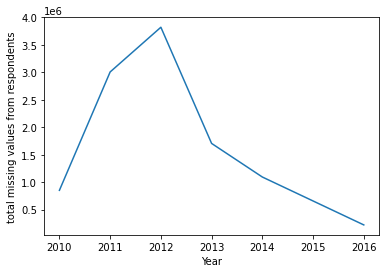

In [18]:
#plotting the change in number of null answer over the years
plt.plot(missings_per_year)
plt.xlabel('Year')
plt.ylabel('total missing values from respondents')
plt.show()

<strong> Answer</strong> <br>
No, it is initially increases but after 2012 it decreases. Please note that the answer might be different is we change our definition of null values. For instance, here we assumed 'I don't know' as a missing value but someone might think 'I don't know' is not a missing values. That will change the results. 

### Question 1. part (b): How do the proportion of records with missing values vary over the different countries?

In [19]:
# adding a missing boolean column for each row
df['missing'] = df.isnull().any(axis=1)

In [20]:
#missing values per country
missing_per_country = df.groupby(df['V2'])['missing'].sum()
missing_per_country

V2
Algeria                1200.0
Argentina              1030.0
Armenia                1100.0
Australia              1477.0
Azerbaijan             1002.0
Belarus                1535.0
Brazil                 1486.0
Chile                  1000.0
China                  2300.0
Colombia               1512.0
Cyprus                 1000.0
Ecuador                1202.0
Egypt                  1523.0
Estonia                1533.0
Georgia                1202.0
Germany                2046.0
Ghana                  1552.0
Haiti                  1996.0
Hong Kong              1000.0
India                  4078.0
Iraq                   1200.0
Japan                  2443.0
Jordan                 1200.0
Kazakhstan             1500.0
Kuwait                 1303.0
Kyrgyzstan             1500.0
Lebanon                1200.0
Libya                  2131.0
Malaysia               1300.0
Mexico                 2000.0
Morocco                1200.0
Netherlands            1902.0
New Zealand             841.0
Nigeria

Since our definition of null values is broad, there is no records without missing values as indicated in missing column. Again, we might get different answer if we change our definition of null values. 

In [21]:
#total missing values
missing_sum = missing_per_country.sum()
missing_sum

89565.0

In [22]:
#percentage of issing values
percentage = (missing_per_country / missing_sum)*100
percentage

V2
Algeria                1.339809
Argentina              1.150003
Armenia                1.228158
Australia              1.649082
Azerbaijan             1.118741
Belarus                1.713839
Brazil                 1.659130
Chile                  1.116508
China                  2.567967
Colombia               1.688159
Cyprus                 1.116508
Ecuador                1.342042
Egypt                  1.700441
Estonia                1.711606
Georgia                1.342042
Germany                2.284374
Ghana                  1.732820
Haiti                  2.228549
Hong Kong              1.116508
India                  4.553118
Iraq                   1.339809
Japan                  2.727628
Jordan                 1.339809
Kazakhstan             1.674761
Kuwait                 1.454809
Kyrgyzstan             1.674761
Lebanon                1.339809
Libya                  2.379278
Malaysia               1.451460
Mexico                 2.233015
Morocco                1.339809
Nethe

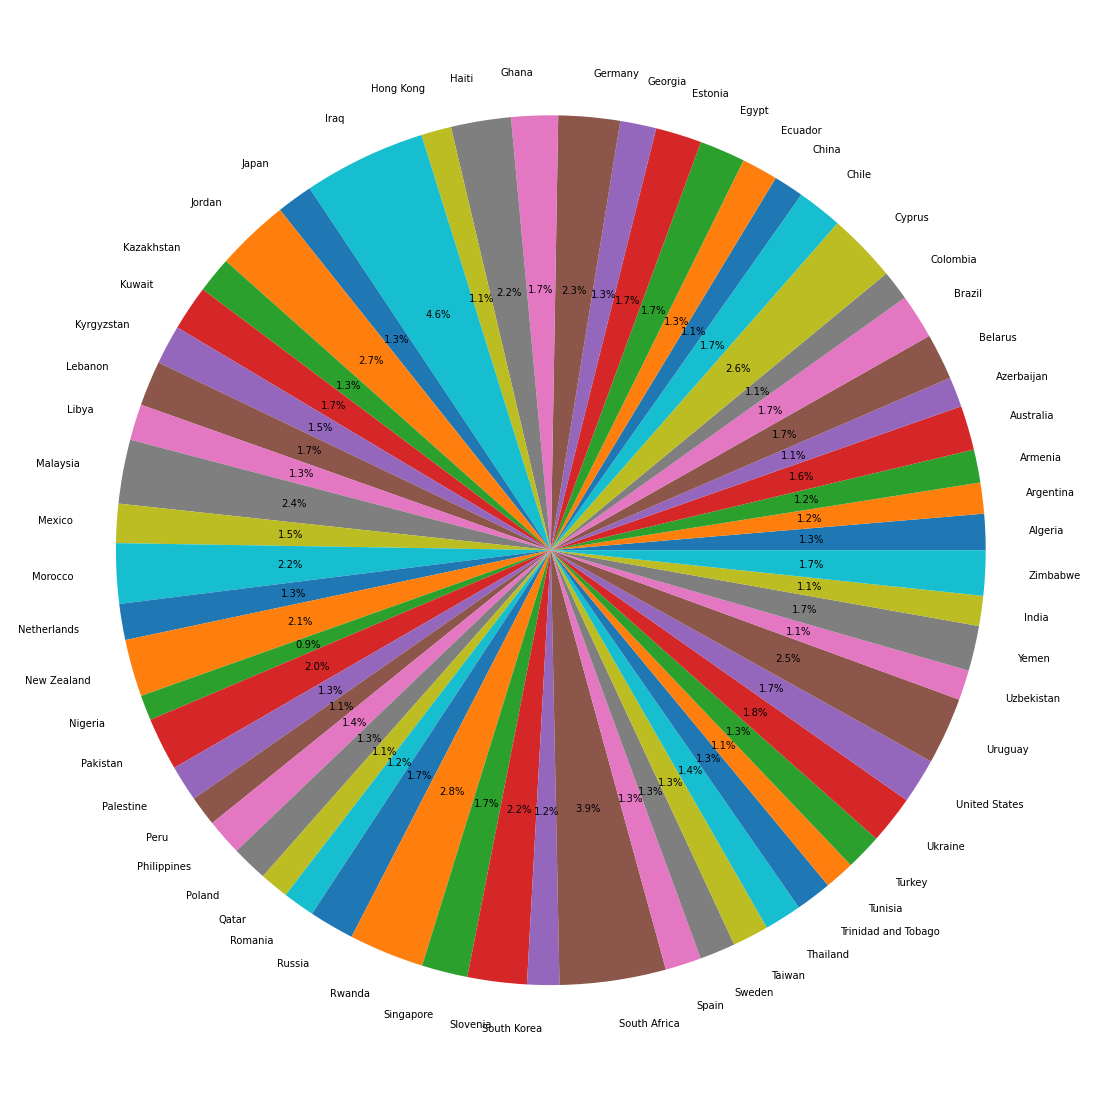

In [23]:
plt.figure(figsize=(20,20)) 
plt.pie(percentage, labels = df['V2'].unique(), autopct='%1.1f%%');

The above graph shows how the missing values are divided between countries.

### Question 1. part (c): Create a new Pandas dataframe with the following columns, populate the dataframe with appropriate values, and write it out as a CSV file.

In [24]:
#first define a column with number of missing value in each row
df['missing_number'] = df.isnull().sum(axis=1)

#second define another column and populate it with 1 and 0. 1 means there is more than 5 missing values and vice versa.
df['missing_over_5'] = np.where(df['missing_number'] > 5, 1, 0)
df[['missing_number', 'missing_over_5']]

,missing_number,missing_over_5
0,77,1
1,77,1
2,62,1
3,66,1
4,63,1
...,...,...
89560,115,1
89561,121,1
89562,123,1
89563,120,1


In [25]:
#first make a datafarme that shows count the total number of responses and classify them based on country and year.
frame1 = df.groupby(['V262', 'V2']).size().to_frame()

#second dataframe shows that number of respondant with over 5 missing responses. 
frame2 = df.groupby(['V262', 'V2'])['missing_over_5'].sum().to_frame()

#merging the data on year and country columns
total_frame = frame1.merge(frame2, on = ['V262', 'V2'], how = 'outer' )

In [26]:
#renaming the columns
total_frame = total_frame.reset_index().rename(columns = {'V262':'Survey year', 
                              'V2':'Country', 
                              0:'Total count of respondents', 
                              'missing_over_5':'Proportion of respondents with missing responses for more than five questions'})

In [27]:
total_frame.head()

,Survey year,Country,Total count of respondents,Proportion of respondents with missing responses for more than five questions
0,2010,Japan,2443,2443
1,2010,Qatar,1060,1060
2,2010,South Korea,1200,1200
3,2010,Trinidad and Tobago,999,999
4,2011,Armenia,1100,1100


In [28]:
#now let's fill the last column correctly with the percentage
total_frame['Proportion of respondents with missing responses for more than five questions'] = (total_frame['Proportion of respondents with missing responses for more than five questions']/total_frame['Total count of respondents'])*100

In [29]:
total_frame

,Survey year,Country,Total count of respondents,Proportion of respondents with missing responses for more than five questions
0,2010,Japan,2443,100.0
1,2010,Qatar,1060,100.0
2,2010,South Korea,1200,100.0
3,2010,Trinidad and Tobago,999,100.0
4,2011,Armenia,1100,100.0
5,2011,Azerbaijan,1002,100.0
6,2011,Belarus,1535,100.0
7,2011,Cyprus,1000,100.0
8,2011,Estonia,1533,100.0
9,2011,Kazakhstan,1500,100.0


Again as you see there is no country that have a respondant with less than 5 missing value! that is because of the broad definition of missing values that we chose initially. 

In [30]:
#converting the dataframe to csv file
total_frame.to_csv('1.c', index = False)

### Question (2). part(a): Use respondent’s literate/illiterate status (V255) to answer the following questions. Supplement your answers with suitable graphs whenever possible. How does the proportion of respondents who are illiterate vary across countries?

In [31]:
#classifying the data based on countries and couting the number of illiterate people (V255 = 2) & literate people (V255 = 1)
illiterate = df.groupby(['V2'])['V255'].value_counts(normalize=True)*100
illiterate = illiterate.to_frame()
illiterate = illiterate.rename(columns={'V255': 'column'}).reset_index()
illiterate = illiterate.rename(columns={'V2': 'Countries',
                          'column': 'Percentage of illiterate people'})
illiterate

,Countries,V255,Percentage of illiterate people
0,Algeria,1.0,82.666667
1,Algeria,2.0,17.333333
2,Armenia,1.0,98.151571
3,Armenia,2.0,1.848429
4,Azerbaijan,1.0,97.804391
...,...,...,...
94,Uzbekistan,2.0,0.866667
95,Yemen,1.0,59.600000
96,Yemen,2.0,40.400000
97,Zimbabwe,1.0,92.533333


In [32]:
#getting a list of countries that have illiterate people
illiterate_2 = illiterate.loc[illiterate['V255'] == 2.0]
set1 = illiterate_2['Countries'].unique()
set1

array(['Algeria', 'Armenia', 'Azerbaijan', 'Belarus', 'Brazil', 'Chile',
       'Colombia', 'Cyprus', 'Ecuador', 'Egypt', 'Georgia', 'Germany',
       'Ghana', 'Haiti', 'Hong Kong', 'India', 'Iraq', 'Jordan',
       'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Lebanon', 'Libya',
       'Malaysia', 'Mexico', 'Morocco', 'Nigeria', 'Pakistan',
       'Palestine', 'Peru', 'Philippines', 'Poland', 'Romania', 'Russia',
       'Rwanda', 'South Africa', 'South Korea', 'Sweden', 'Taiwan',
       'Thailand', 'Tunisia', 'Turkey', 'Ukraine', 'Uruguay',
       'Uzbekistan', 'Yemen', 'Zimbabwe'], dtype=object)

In [33]:
#list of all countries
set2 = illiterate['Countries'].unique()
set2

array(['Algeria', 'Armenia', 'Azerbaijan', 'Belarus', 'Brazil', 'Chile',
       'China', 'Colombia', 'Cyprus', 'Ecuador', 'Egypt', 'Estonia',
       'Georgia', 'Germany', 'Ghana', 'Haiti', 'Hong Kong', 'India',
       'Iraq', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan',
       'Lebanon', 'Libya', 'Malaysia', 'Mexico', 'Morocco', 'Netherlands',
       'Nigeria', 'Pakistan', 'Palestine', 'Peru', 'Philippines',
       'Poland', 'Romania', 'Russia', 'Rwanda', 'South Africa',
       'South Korea', 'Spain', 'Sweden', 'Taiwan', 'Thailand', 'Tunisia',
       'Turkey', 'Ukraine', 'Uruguay', 'Uzbekistan', 'Yemen', 'Zimbabwe'],
      dtype=object)

In [34]:
# which countries don't have any illiterate people?
list(set(set2) - set(set1))

['China', 'Estonia', 'Netherlands', 'Spain', 'Japan']

In [35]:
# making a data frame of the countries with no illiterate people.
rest = pd.DataFrame([['Spain', 2.00, 0.00],['China', 2.00, 0.00],
                     ['Netherlands', 2.00, 0.00],['Japan', 2.00, 0.00],
                     ['Estonia', 2.00, 0.00]], columns = ['Countries', 'V255', 'Percentage of illiterate people'])
rest

,Countries,V255,Percentage of illiterate people
0,Spain,2.0,0.0
1,China,2.0,0.0
2,Netherlands,2.0,0.0
3,Japan,2.0,0.0
4,Estonia,2.0,0.0


In [36]:
#appending the illiterate_2 dataframe to complete the list of the countries
Countries_illiterate = rest.append(illiterate_2)
Countries_illiterate

,Countries,V255,Percentage of illiterate people
0,Spain,2.0,0.000000
1,China,2.0,0.000000
2,Netherlands,2.0,0.000000
3,Japan,2.0,0.000000
4,Estonia,2.0,0.000000
1,Algeria,2.0,17.333333
3,Armenia,2.0,1.848429
5,Azerbaijan,2.0,2.195609
7,Belarus,2.0,0.456026
9,Brazil,2.0,0.807537


In [37]:
#dropping the V255 column
del Countries_illiterate['V255']

In [38]:
Countries_illiterate = Countries_illiterate.reset_index()

In [39]:
del Countries_illiterate['index']

In [40]:
Countries_illiterate

,Countries,Percentage of illiterate people
0,Spain,0.000000
1,China,0.000000
2,Netherlands,0.000000
3,Japan,0.000000
4,Estonia,0.000000
5,Algeria,17.333333
6,Armenia,1.848429
7,Azerbaijan,2.195609
8,Belarus,0.456026
9,Brazil,0.807537


So, here is the list of countries with the percentage of illiterate people.

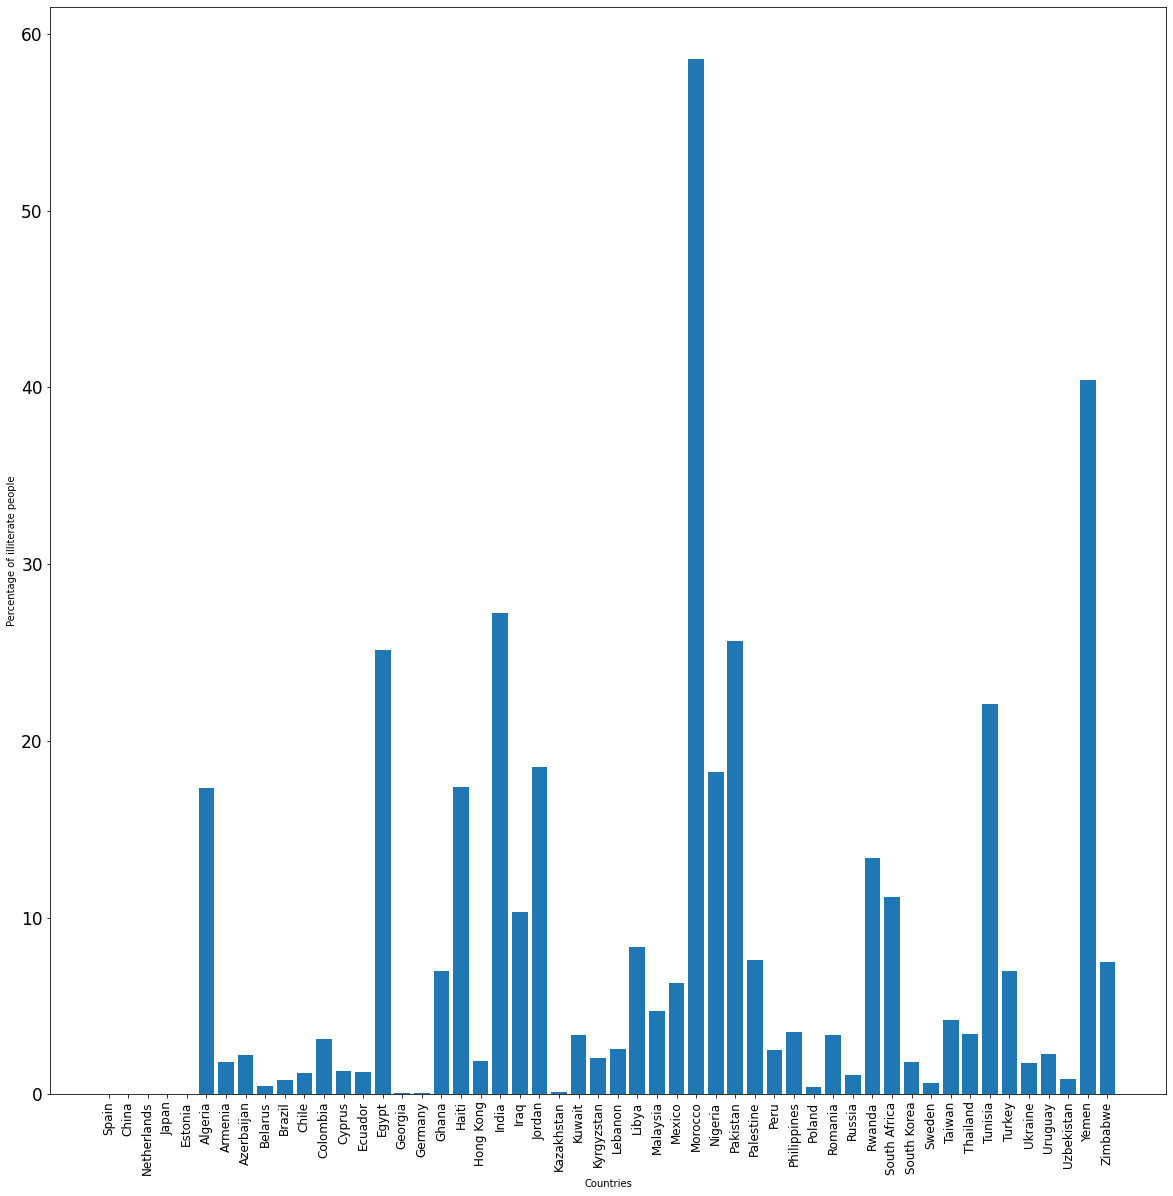

In [41]:
#plotting the data
plt.figure(figsize=(20,20)) 
plt.bar(Countries_illiterate['Countries'], Countries_illiterate['Percentage of illiterate people'])
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Percentage of illiterate people')
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=17)
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 17
#plt.show()

Morocco has the highest number of illitearte people.

### Question 2. part(b): Are there differences in the religious beliefs1 between literate and illiterate respondents? Does the extent of this difference vary across countries?

To answer this question, we focused on V144 column that shows the religion of each respondant. 

In [42]:
#group the data based on literacy on counting the number of believers in each religion
religions = df.groupby(['V255'])['V144'].value_counts().to_frame()
religions = religions.rename(columns={'V144': 'column'}).reset_index()
religions = religions.rename(columns={'V144': 'Religions',
                         'V255':'Literacy',
                         'column': 'Number of People'})
religions

,Literacy,Religions,Number of People
0,1.0,Muslim,15227
1,1.0,None,13127
2,1.0,Roman Catholic,11735
3,1.0,Orthodox,7792
4,1.0,Protestant,3835
...,...,...,...
85,2.0,Mormon,1
86,2.0,Other: Christian com,1
87,2.0,Spiritista,1
88,2.0,The Church of Sweden,1


In [43]:
#making a pivot table 
results = religions.pivot("Religions", "Literacy", "Number of People")
results.rename(columns = {1.0: 'literate',
                         2.0: 'illiterate'})

Literacy,literate,illiterate
Religions,,
Aglipayan,184.0,30.0
Al-Hadis,156.0,33.0
Alliance,215.0,58.0
Ancestral worshipping / Tradition,45.0,7.0
Anglican,440.0,71.0
Armenian Apostolic Church,1522.0,120.0
Assembly of God,1.0,NaN
Bahai,3.0,NaN
Baptist,19.0,3.0


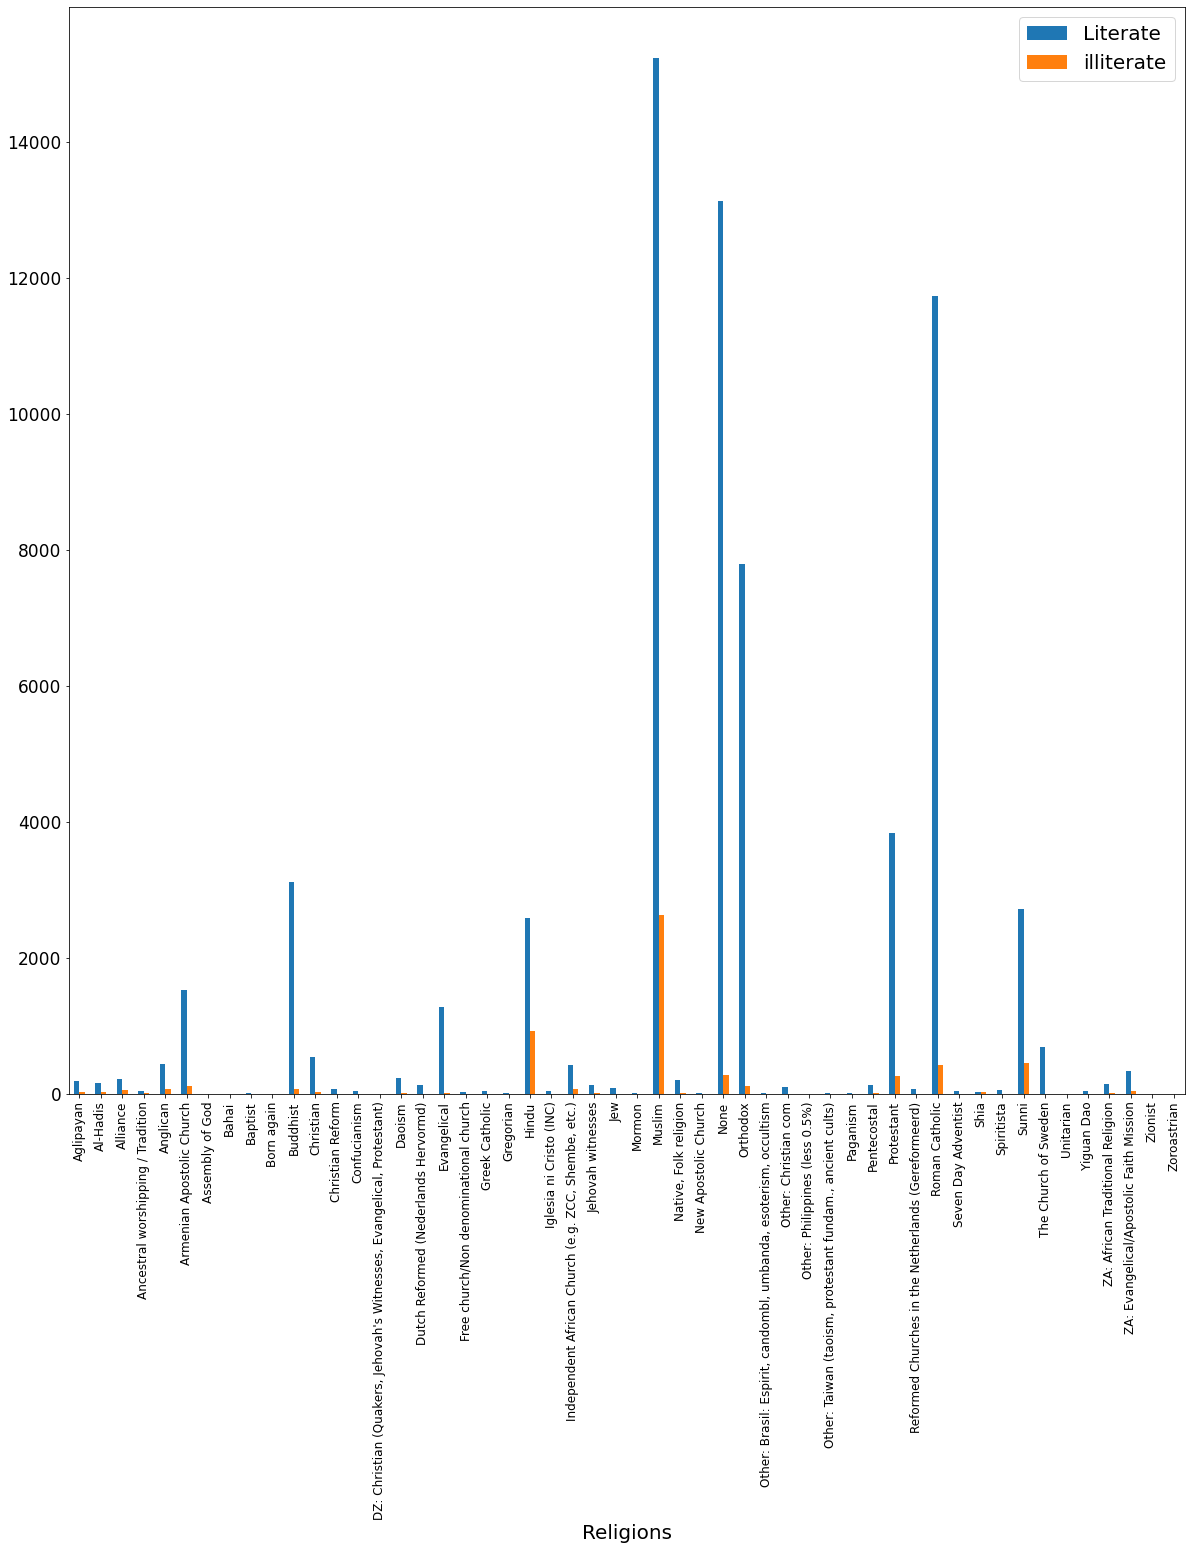

In [44]:
#plotting the data
ax = religions.pivot("Religions", "Literacy", "Number of People").plot(kind='bar', figsize=(20,20))
ax.legend(["Literate", "illiterate"], fontsize=20)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=17)
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 17
#plt.show()

Now, we saw the difference between the religion of literate and illiterate people. Let's see their distribution across countries.

In [45]:
#this time we group the data based on literacy and countries
results2 = df.groupby(['V255', 'V2'])['V144'].value_counts().to_frame()
results2 = results2.rename(columns={'V144': 'column'}).reset_index()
results2 = results2.rename(columns={'V144': 'Religions',
                                    'V255':'Literacy',
                                    'column': 'Number of People',
                                   'V2': 'Countries'})
results2

,Literacy,Countries,Religions,Number of People
0,1.0,Algeria,Muslim,987
1,1.0,Algeria,"DZ: Christian (Quakers, Jehovah's Witnesses, E...",5
2,1.0,Armenia,Armenian Apostolic Church,959
3,1.0,Armenia,None,67
4,1.0,Armenia,Paganism,9
...,...,...,...,...
486,2.0,Zimbabwe,Protestant,78
487,2.0,Zimbabwe,Roman Catholic,26
488,2.0,Zimbabwe,None,5
489,2.0,Zimbabwe,Muslim,2


In [46]:
#let's just look at the armenia as an example
Countries = results2['Countries'].unique()

results_armenia = results2.loc[results2['Countries'] == 'Armenia']
results_armenia

,Literacy,Countries,Religions,Number of People
2,1.0,Armenia,Armenian Apostolic Church,959
3,1.0,Armenia,None,67
4,1.0,Armenia,Paganism,9
5,1.0,Armenia,Orthodox,6
6,1.0,Armenia,Buddhist,1
7,1.0,Armenia,Jew,1
8,1.0,Armenia,Muslim,1
9,1.0,Armenia,Roman Catholic,1
330,2.0,Armenia,Armenian Apostolic Church,17
331,2.0,Armenia,Paganism,2


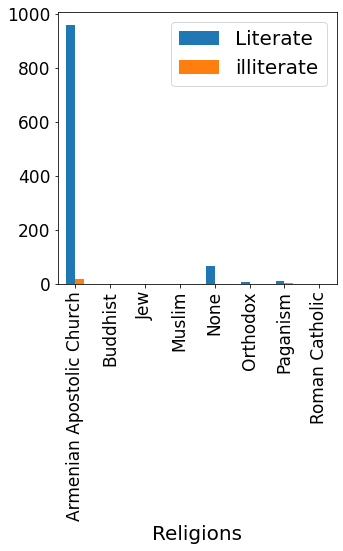

In [47]:
#plotting the resukt for armenia
results_armenia.pivot("Religions", "Literacy", "Number of People").plot(kind='bar', figsize=(5,5))
plt.legend(["Literate", "illiterate"], fontsize=20)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)
#plt.show()

Now, lets do the same for all countries.

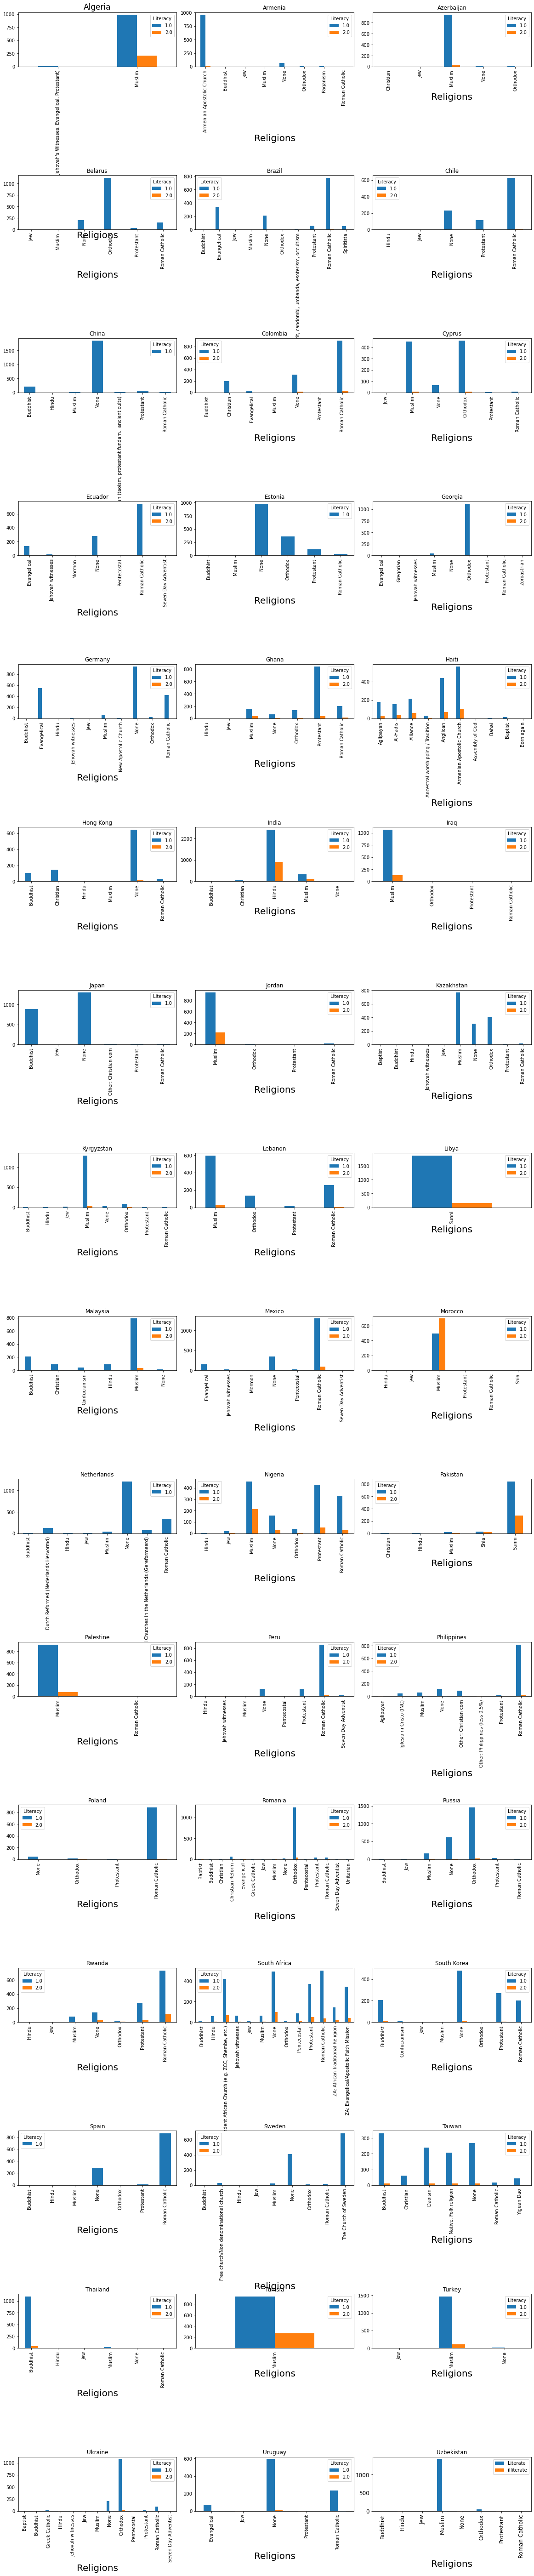

In [48]:
Countries = results2['Countries'].unique()
ncol=3
nrow= len(Countries) // ncol
count=0

fig, axes = plt.subplots(nrow, ncol) 
#fig.set_figheight(15)
#fig.set_figwidth(15)
plt.subplots_adjust(wspace=0.12, hspace=2)
#plt.tight_layout()

for r in range(nrow):
    for c in range(ncol):
        results2.loc[results2['Countries'] == Countries[count]].pivot("Religions", "Literacy", "Number of People").plot(kind='bar', figsize=(20,100), ax=axes[r,c], title = Countries[count])
        plt.legend(["Literate", "illiterate"])
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
        plt.rcParams['axes.labelsize'] = 12
        plt.rcParams['axes.titlesize'] = 12
        count += 1

### Question 2. part (c): Examine the data to identify other noticeable differences between literate and illiterate respondents.

First, we look at the opinion of illitearte and literate people about older people through column V167. Whether Older people are a burden on society? <br>
1.- Strongly agree <br>
2.- Agree <br>
3.- Disagree <br>
4.- Strongly disagree <br>

In [49]:
df['V167'].replace(1, '1. Strongly agree', inplace = True)
df['V167'].replace(2, '2. Agree', inplace = True)
df['V167'].replace(3, '3. Disagree', inplace = True)
df['V167'].replace(4, '4. Strongly disagree', inplace = True)
old_people = df.groupby(['V255'])['V167'].value_counts(normalize=True)*100
old_people = old_people.to_frame()
old_people = old_people.rename(columns={'V167': 'column'}).reset_index()

In [50]:
old_people = old_people.rename(columns={'V167': 'Attitude Toward old people',
                                    'V255':'Literacy',
                                    'column': 'Number of People'})
old_people

,Literacy,Attitude Toward old people,Number of People
0,1.0,3. Disagree,44.383770
1,1.0,4. Strongly disagree,38.012409
2,1.0,2. Agree,13.101314
3,1.0,1. Strongly agree,4.502507
4,2.0,4. Strongly disagree,38.691089
5,2.0,3. Disagree,35.295328
6,2.0,2. Agree,18.254785
7,2.0,1. Strongly agree,7.758798


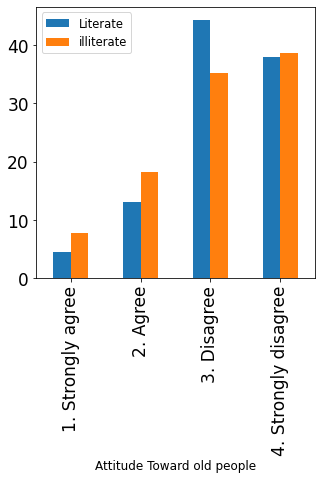

In [51]:
old_people.pivot("Attitude Toward old people", "Literacy", "Number of People").plot(kind='bar', figsize=(5,5))
plt.legend(["Literate", "illiterate"], fontsize=11.5)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)
#plt.show()

<strong> Higher percentage of illiterate people think old people are a burden on the society! </strong>

Second. Let's how literate and illiterate people think about weapons for securiy. column 178 <br>
Things done for reasons of security: Carried a knife, gun or other weapon<br>
1.- Yes<br>
5.- No<br>

In [52]:
df['V178'].replace(1, 'yes', inplace = True)
df['V178'].replace(5, 'No', inplace = True)
weapons = df.groupby(['V255'])['V178'].value_counts(normalize=True)*100
weapons = weapons.to_frame()
weapons = weapons.rename(columns={'V178': 'column'}).reset_index()

In [53]:
weapons = weapons.rename(columns={'V178': 'Carrying weapon',
                                    'V255':'Literacy',
                                    'column': 'Number of People'})
weapons

,Literacy,Carrying weapon,Number of People
0,1.0,No,93.375650
1,1.0,yes,6.624350
2,2.0,No,91.553223
3,2.0,yes,8.446777


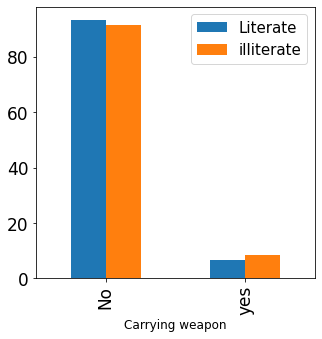

In [54]:
weapons.pivot("Carrying weapon", "Literacy", "Number of People").plot(kind='bar', figsize=(5,5))
plt.legend(["Literate", "illiterate"], fontsize=15)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)
#plt.show()

There is no significant difference in atitude of people toward carrying weapons for safety based on their literacy. However, it seems that illiterate people slightly have more tendency to carry weapons. 

Third and last. Lets see how literate and illiterate people think about science and technology<br>
V197 The world is better off, or worse off, because of science and technology<br>
1.- A lot worse off <br>
2.- 2 <br>
3.- 3 <br>
4.- 4 <br>
5.- 5 <br>
6.- 6 <br>
7.- 7 <br>
8.- 8 <br>
9.- 9 <br>
10.- A lot better off <br>

I alreday cleaned the data so smaller numbers means worse attitude. 

In [55]:
science = df.groupby(['V255'])['V197'].value_counts(normalize=True)*100
science = science.to_frame()
science = science.rename(columns={'V197': 'column'}).reset_index()

In [56]:
science = science.rename(columns={'V197': 'Attitude toward science',
                                    'V255':'Literacy',
                                    'column': 'Number of People'})
science

,Literacy,Attitude toward science,Number of People
0,1.0,10.0,21.691318
1,1.0,8.0,19.394959
2,1.0,7.0,14.469912
3,1.0,9.0,12.517294
4,1.0,5.0,10.841380
5,1.0,6.0,9.661822
6,1.0,1.0,3.726947
7,1.0,4.0,3.451669
8,1.0,3.0,2.583047
9,1.0,2.0,1.661651


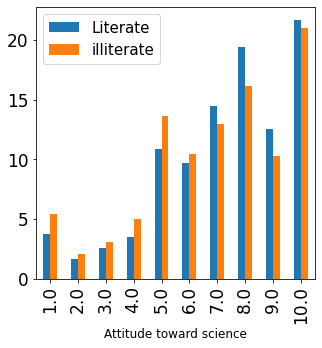

In [57]:
science.pivot("Attitude toward science", "Literacy", "Number of People").plot(kind='bar', figsize=(5,5))
plt.legend(["Literate", "illiterate"], fontsize=15)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)
#plt.show()

Most people think world is better with science and technology. The proportion of literate people who has a positive attitude toward science and tech is higher comparing to illiterate people. The proportion of illiterate people with negative attitude toward science and technology is more.  

V150 Meaning of religion: To follow religious norms and ceremonies vs To do good to other people <br>
1.- Follow religious norms and ceremonies <br>
2.- Do good to other people <br>
3.- Neither of them, other (SI,IN) <br>
4.- Both (SI,IN) <br>

In [58]:
df['V155'].replace(1, 'Follow religious norms and ceremonies', inplace = True)
df['V155'].replace(2, 'Do good to other people', inplace = True)
df['V155'].replace(3, 'Neither of them, other (SI,IN)', inplace = True)
df['V155'].replace(4, 'Both (SI,IN)', inplace = True)
norms = df.groupby(['V255'])['V155'].value_counts(normalize=True)*100
norms = norms.to_frame()
norms = norms.rename(columns={'V155': 'column'}).reset_index()
norms = norms.rename(columns={'V155': 'Attitude toward religion',
                                    'V255':'Literacy',
                                    'column': 'Number of People'})
norms

,Literacy,Attitude toward religion,Number of People
0,1.0,Do good to other people,31.823033
1,1.0,"Neither of them, other (SI,IN)",29.367015
2,1.0,"Both (SI,IN)",21.735220
3,1.0,Follow religious norms and ceremonies,17.074732
4,2.0,Do good to other people,33.077766
5,2.0,"Both (SI,IN)",22.435195
6,2.0,"Neither of them, other (SI,IN)",22.270902
7,2.0,Follow religious norms and ceremonies,22.216137


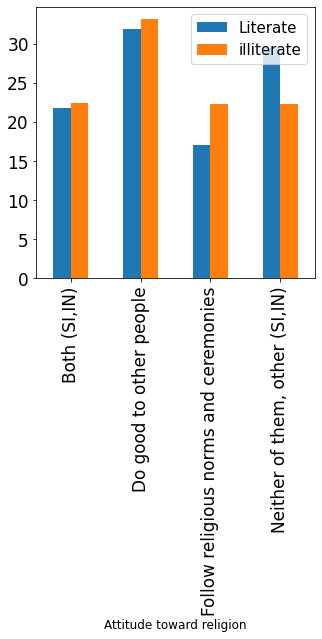

In [59]:
norms.pivot("Attitude toward religion", "Literacy", "Number of People").plot(kind='bar', figsize=(5,5))
plt.legend(["Literate", "illiterate"], fontsize=15)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)

V85 Political action: Signing a petition <br>
1.- Have done <br>
2.- Might do <br>
3.- Would never do <br>

In [60]:
df['V85'].replace(1, 'Have done', inplace = True)
df['V85'].replace(2, 'Might do', inplace = True)
df['V85'].replace(3, 'Would never do', inplace = True)
petition = df.groupby(['V255'])['V85'].value_counts(normalize=True)*100
petition = petition.to_frame()
petition = petition.rename(columns={'V85': 'column'}).reset_index()
petition = petition.rename(columns={'V85': 'Sigining a petition',
                                    'V255':'Literacy',
                                    'column': 'Number of People'})
petition

,Literacy,Sigining a petition,Number of People
0,1.0,Would never do,53.590992
1,1.0,Might do,29.748935
2,1.0,Have done,16.660073
3,2.0,Would never do,74.349579
4,2.0,Might do,19.604251
5,2.0,Have done,6.046171


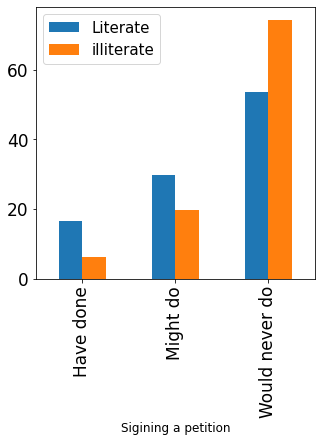

In [61]:
petition.pivot("Sigining a petition", "Literacy", "Number of People").plot(kind='bar', figsize=(5,5))
plt.legend(["Literate", "illiterate"], fontsize=15)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)

V37 Would not like to have as neighbors: People of a different race <br>
1.- Mentioned <br>
2.- Not mentioned <br>

In [62]:
df['V37'].replace(1, 'Mentioned', inplace = True)
df['V37'].replace(2, 'Not Mentioned', inplace = True)
race = df.groupby(['V255'])['V37'].value_counts(normalize=True)*100
race = race.to_frame()
race = race.rename(columns={'V37': 'column'}).reset_index()
race = race.rename(columns={'V37': 'Acceptance',
                                    'V255':'Literacy',
                                    'column': 'Number of People'})
race

,Literacy,Acceptance,Number of People
0,1.0,Not Mentioned,80.211651
1,1.0,Mentioned,19.788349
2,2.0,Not Mentioned,74.615385
3,2.0,Mentioned,25.384615


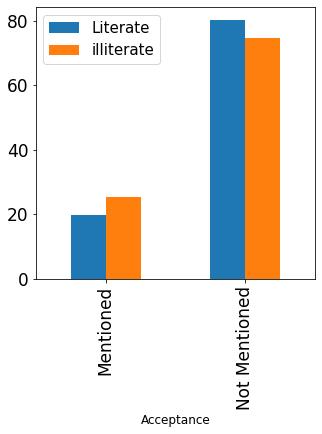

In [63]:
race.pivot("Acceptance", "Literacy", "Number of People").plot(kind='bar', figsize=(5,5))
plt.legend(["Literate", "illiterate"], fontsize=15)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)

How many children do you have <br>
0.- No children <br>
1.- 1 child <br>
2.- 2 children <br>
3.- 3 children <br>
4.- 4 children <br>
5.- 5 children <br>
6.- 6 children <br>
7.- 7 children <br>
8.- 8 or more children <br>

In [64]:

numChild = df.groupby(['V255'])['V58'].value_counts(normalize=True)*100
numChild = numChild.to_frame()
numChild = numChild.rename(columns={'V58': 'column'}).reset_index()
numChild = numChild.rename(columns={'V58': 'Number of Children',
                                    'V255':'Literacy',
                                    'column': 'Number of People'})
numChild

,Literacy,Number of Children,Number of People
0,1.0,No children,30.830219
1,1.0,2 children,25.079284
2,1.0,1 child,17.271209
3,1.0,3 children,13.675105
4,1.0,4 children,6.499887
5,1.0,5 children,3.195435
6,1.0,6 children,1.616831
7,1.0,8,0.999547
8,1.0,7,0.832484
9,2.0,No children,18.678526


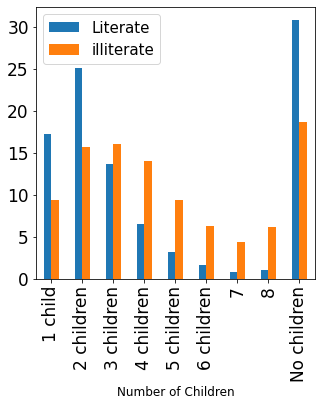

In [65]:
numChild.pivot("Number of Children", "Literacy", "Number of People").plot(kind='bar', figsize=(5,5))
plt.legend(["Literate", "illiterate"], fontsize=15)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)

This question can go on for ever but since we have three more question to solve. Let's wrap up and move one.

### Question 3. Considering only United States data, answer the following questions. Supplement your answers with suitable graphs whenever possible.
Part (a): Derive the absolute rank and the rank in percentile terms for the different U.S. states featured in the dataset (V256B) according to: <br>
i. Overall satisfaction with life (V23) <br>
ii. Job worries (V181) <br>

In [66]:
# let's get a overall understanding of the V256B column
df['V256B'].unique()

array([nan, 'AZ: Binegedi', 'AZ: Garadag', ..., 'ZW: Bulawayo Rural',
       'ZW: Masvingo', 'ZW: Masvingo Rural'], dtype=object)

In [67]:
# separate the US states from data
united_states = df[df['V256B'].str.contains("US", na=False)]
united_states['V256B'].unique()

array(['US: WA', 'US: CA', 'US: AR', 'US: WV', 'US: PA', 'US: MA',
       'US: IN', 'US: CO', 'US: MI', 'US: OR', 'US: GA', 'US: WI',
       'US: SD', 'US: NE', 'US: MS', 'US: NY', 'US: AL', 'US: OH',
       'US: MD', 'US: NJ', 'US: MO', 'US: TX', 'US: NV', 'US: RI',
       'US: NC', 'US: IL', 'US: IA', 'US: AZ', 'US: WY', 'US: FL',
       'US: ME', 'US: UT', 'US: LA', 'US: VA', 'US: TN', 'US: MN',
       'US: NM', 'US: OK', 'US: ID', 'US: KY', 'US: DE', 'US: CT',
       'US: SC', 'US: KS', 'US: DC', 'US: NH', 'US: ND', 'US: MT',
       'US: VT', 'US: AK', 'US: HI'], dtype=object)

In [68]:
# Grouping the data based on states and counting the values with overall satisfaction of life
united_states = united_states.groupby('V256B')['V23'].value_counts().to_frame()
united_states = united_states.rename(columns={'V23': 'column'}).reset_index()

#let's look at the california section as an example 
California = united_states.loc[united_states['V256B'] == 'US: CA']
California

,V256B,V23,column
26,US: CA,8.0,92
27,US: CA,7.0,47
28,US: CA,9.0,42
29,US: CA,10.0,25
30,US: CA,6.0,24
31,US: CA,5.0,14
32,US: CA,4.0,7
33,US: CA,2.0,4
34,US: CA,3.0,2


In [69]:
del California['V256B']
California

,V23,column
26,8.0,92
27,7.0,47
28,9.0,42
29,10.0,25
30,6.0,24
31,5.0,14
32,4.0,7
33,2.0,4
34,3.0,2


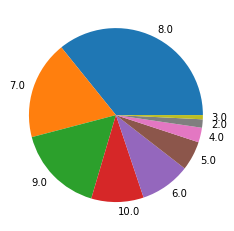

In [70]:
plt.pie(California['column'], labels = California['V23'].unique());

<strong> Note </strong>
Higher number means more satisfaction. As we look at our example, we see people are more satisfied with their life in california. I cannot even blame them!

In [71]:
united_states =  united_states.rename(columns={'V256B': 'States',
                                    'V23':'Satisfaction with your life',
                                    'column': 'Number of People'})
#driving the percental rank
united_states.sort_values(['Satisfaction with your life', 'Number of People'], inplace=True, ascending = False)
united_states 

,States,Satisfaction with your life,Number of People
289,US: TX,10.0,29
29,US: CA,10.0,25
62,US: FL,10.0,21
150,US: MI,10.0,8
230,US: NY,10.0,8
...,...,...,...
132,US: MA,2.0,1
155,US: MI,2.0,1
164,US: MN,2.0,1
211,US: NJ,2.0,1


<strong> Percental rank: </strong> <br>
    The above shows the rank of each state based on each answer. I assume the percental rank means the rank of each state based on satisfaction with life. For instance for satisfaction with life = 10, texas has the highest rank, then california, then florida. We can drive the percental rank for other answers from the above dataset. 

In [72]:
#abosulte rank
united_states.sort_values(['Number of People'], inplace=True, ascending = False)
united_states

,States,Satisfaction with your life,Number of People
26,US: CA,8.0,92
225,US: NY,8.0,50
287,US: TX,9.0,49
27,US: CA,7.0,47
288,US: TX,8.0,46
...,...,...,...
8,US: AL,5.0,1
203,US: NH,10.0,1
247,US: OK,10.0,1
277,US: SD,10.0,1


This ranking shows teh overall ranking of states based on the number of people. As we see. Californian people who answered 8 has teh highest number in the ranking. While people from tennesse you answered 2 has the lowest ranking. 

<strong> average ranking </strong>

In [73]:
united_states.groupby('States')['Satisfaction with your life'].mean().nlargest(6)    

States
US: VT    10.000000
US: RI     9.000000
US: AK     8.666667
US: SD     8.500000
US: DC     8.000000
US: MT     8.000000
Name: Satisfaction with your life, dtype: float64

In [74]:
united_states.groupby('States')['Satisfaction with your life'].mean().nsmallest(6)

States
US: AZ    6.0
US: CA    6.0
US: ID    6.0
US: MA    6.0
US: MD    6.0
US: MI    6.0
Name: Satisfaction with your life, dtype: float64

Now, let's move on to the next column which about the worrisome about job. <br>
Worries: Losing my job or not finding a job<br>
1.- Very much <br>
2.- A great deal <br>
3.- Not much <br>
4.- Not at all <br>

In [75]:
df['V181'].replace('1', '1. Very much', inplace = True)
df['V181'].replace('2', '2. A great deal', inplace = True)
df['V181'].replace('3', '3. Not much', inplace = True)
df['V181'].replace('4', '4. Not at all', inplace = True)

united_states2 = df[df['V256B'].str.contains("US", na=False)]
united_states2 = united_states2.groupby('V256B')['V181'].value_counts().to_frame()
united_states2 = united_states2.rename(columns={'V181': 'column'}).reset_index()
united_states2 =  united_states2.rename(columns={'V256B': 'States',
                                    'V181':'Worriness About Job',
                                    'column': 'Number of People'})
united_states2

,States,Worriness About Job,Number of People
0,US: AK,4. Not at all,2
1,US: AK,3. Not much,1
2,US: AL,4. Not at all,11
3,US: AL,3. Not much,7
4,US: AL,2. A great deal,5
...,...,...,...
183,US: WV,3. Not much,2
184,US: WY,3. Not much,3
185,US: WY,1. Very much,1
186,US: WY,2. A great deal,1


In [76]:
# getting the percental rank similar to what we did in the satisfaction with job
united_states2.sort_values(['Worriness About Job', 'Number of People'], inplace=True, ascending = False)
united_states2

,States,Worriness About Job,Number of People
14,US: CA,4. Not at all,70
159,US: TX,4. Not at all,57
32,US: FL,4. Not at all,56
126,US: NY,4. Not at all,47
142,US: PA,4. Not at all,40
...,...,...,...
26,US: DC,1. Very much,1
80,US: ME,1. Very much,1
98,US: MT,1. Very much,1
112,US: NH,1. Very much,1


People in california has the highest amount of worriness about job. Then florida and texas. 

In [77]:
#abosulte rank
united_states2.sort_values(['Number of People'], inplace=True, ascending = False)
united_states2

,States,Worriness About Job,Number of People
13,US: CA,1. Very much,80
14,US: CA,4. Not at all,70
15,US: CA,3. Not much,63
159,US: TX,4. Not at all,57
32,US: FL,4. Not at all,56
...,...,...,...
171,US: VT,3. Not much,1
27,US: DC,3. Not much,1
1,US: AK,3. Not much,1
187,US: WY,4. Not at all,1


Wow, california has the greatest number who are very much worry about their job. It is in both ranking list, both in percental rank and overal rank. 

### Question 3. Part (b): Create a pivot table with U.S. State (V256B) as index and gender (V240) as the columns. The values in the table must be the average values of the overall satisfaction with life (V23). Query the pivot table for Pennsylvania.

In [78]:
df['V240'].replace(1, 'M', inplace = True)
df['V240'].replace(2, 'F', inplace = True)

#grouping the values based on states and gender and getting the mean of satisfaction
penn = df.groupby(['V256B', 'V240'])['V23'].mean().to_frame()
penn = penn.rename(columns={'V23': 'column'}).reset_index()
penn = penn.rename(columns={'V256B': 'States',
                            'V240':'Gender',
                            'V23':'Satisfaction with your life',
                            'column': 'Average'})
penn

,States,Gender,Average
0,AZ: Absheron,F,8.500000
1,AZ: Absheron,M,7.200000
2,AZ: Agsu,F,8.000000
3,AZ: Agsu,M,8.125000
4,AZ: Astara,F,4.666667
...,...,...,...
2460,ZW: Matebeleland South Rural,M,4.785714
2461,ZW: Midlands Rural,F,6.166667
2462,ZW: Midlands Rural,M,6.807692
2463,ZW: Mutare,F,6.450704


In [79]:
penn.reset_index().pivot_table(index = "States", columns = "Gender", values = "Average")

Gender,F,M
States,,
AZ: Absheron,8.500000,7.200000
AZ: Agsu,8.000000,8.125000
AZ: Astara,4.666667,6.166667
AZ: Balaken,8.500000,7.714286
AZ: Barda,5.750000,7.571429
...,...,...
ZW: Masvingo Rural,6.774194,5.937500
ZW: Matebeleland North Rural,4.210526,5.100000
ZW: Matebeleland South Rural,4.411765,4.785714


So, here is the pivot table that the question asked for. Now, let's check out the results for PA.

In [80]:
penn[penn['States'].str.contains("PA", na=False)].pivot_table(index = "States", columns = "Gender", values = "Average")

Gender,F,M
States,,
US: PA,7.517857,7.313725


### Question 3. part(c): Are there significant differences in the respondents’ values regarding environment (e.g., V30, V78, V80, V81, V83, V122) across people living in the different regions of the U.S. (see V256 and V256B)?

Let's start with V30:<br>
V30 Active/Inactive membership: Environmental organization <br>
0.- Not a member <br>
1.- Inactive member <br>
2.- Active member <br>

In [81]:
df['V30'].replace(0, 'Not a member', inplace = True)
df['V30'].replace(1, 'Inactive member', inplace = True)
df['V30'].replace(2, 'Active member', inplace = True)
us = df[df['V256B'].str.contains("US", na=False)]

In [82]:
us = us.groupby(['V256B'])['V30'].value_counts().to_frame()
us = us.rename(columns={'V30': 'column'}).reset_index()
us = us.rename(columns={'V256B': 'States',
                        'V30':'Environmental organization',
                        'column': 'Number of People'})
us

,States,Environmental organization,Number of People
0,US: AK,Not a member,3
1,US: AL,Not a member,25
2,US: AL,Active member,1
3,US: AR,Not a member,13
4,US: AR,Inactive member,1
...,...,...,...
113,US: WI,Not a member,44
114,US: WI,Inactive member,8
115,US: WI,Active member,6
116,US: WV,Not a member,13


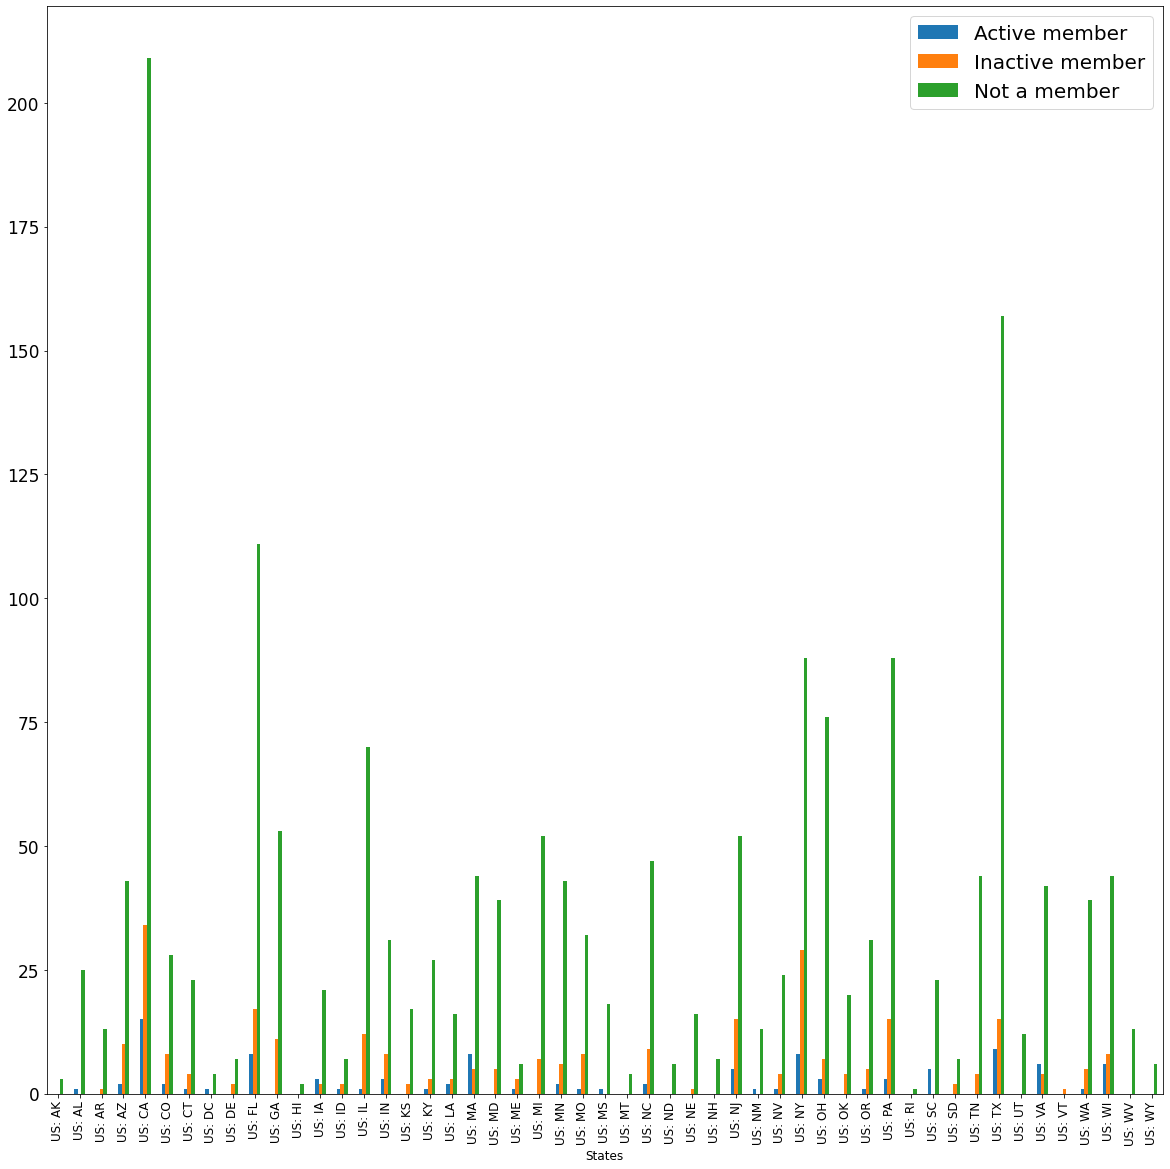

In [83]:
us.pivot("States", "Environmental organization", "Number of People").plot(kind='bar', figsize=(20,20))
plt.legend(fontsize=20)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=17)
plt.rcParams['axes.labelsize'] = 17
plt.rcParams['axes.titlesize'] = 17

V78 Schwartz: Looking after the environment is important to this person; to care for nature and save life resources <br>
1.- Very much like me <br>
2.- Like me <br>
3.- Somewhat like me <br>
4.- A little like me <br>
5.- Not like me <br>
6.- Not at all like me <br>

In [84]:
df['V78'].replace(1, '1. Very much like me', inplace = True)
df['V78'].replace(2, '2. Like me', inplace = True)
df['V78'].replace(3, '3. Somewhat like me', inplace = True)
df['V78'].replace(4, '4. A little like me', inplace = True)
df['V78'].replace(5, '5. Not like me', inplace = True)
df['V78'].replace(6, '6. Not at all like me', inplace = True)
us1 = df[df['V256B'].str.contains("US", na=False)]

In [85]:
us1 = us1.groupby(['V256B'])['V78'].value_counts().to_frame()
us1 = us1.rename(columns={'V78': 'column'}).reset_index()
us1 = us1.rename(columns={'V256B': 'States',
                        'V78':'Looking after the environment',
                        'column': 'Number of People'})
us1

,States,Looking after the environment,Number of People
0,US: AK,A little like me,1
1,US: AK,Like me,1
2,US: AK,Somewhat like me,1
3,US: AL,A little like me,8
4,US: AL,Somewhat like me,7
...,...,...,...
247,US: WV,Not at all like me,1
248,US: WV,Very much like me,1
249,US: WY,Somewhat like me,3
250,US: WY,A little like me,2


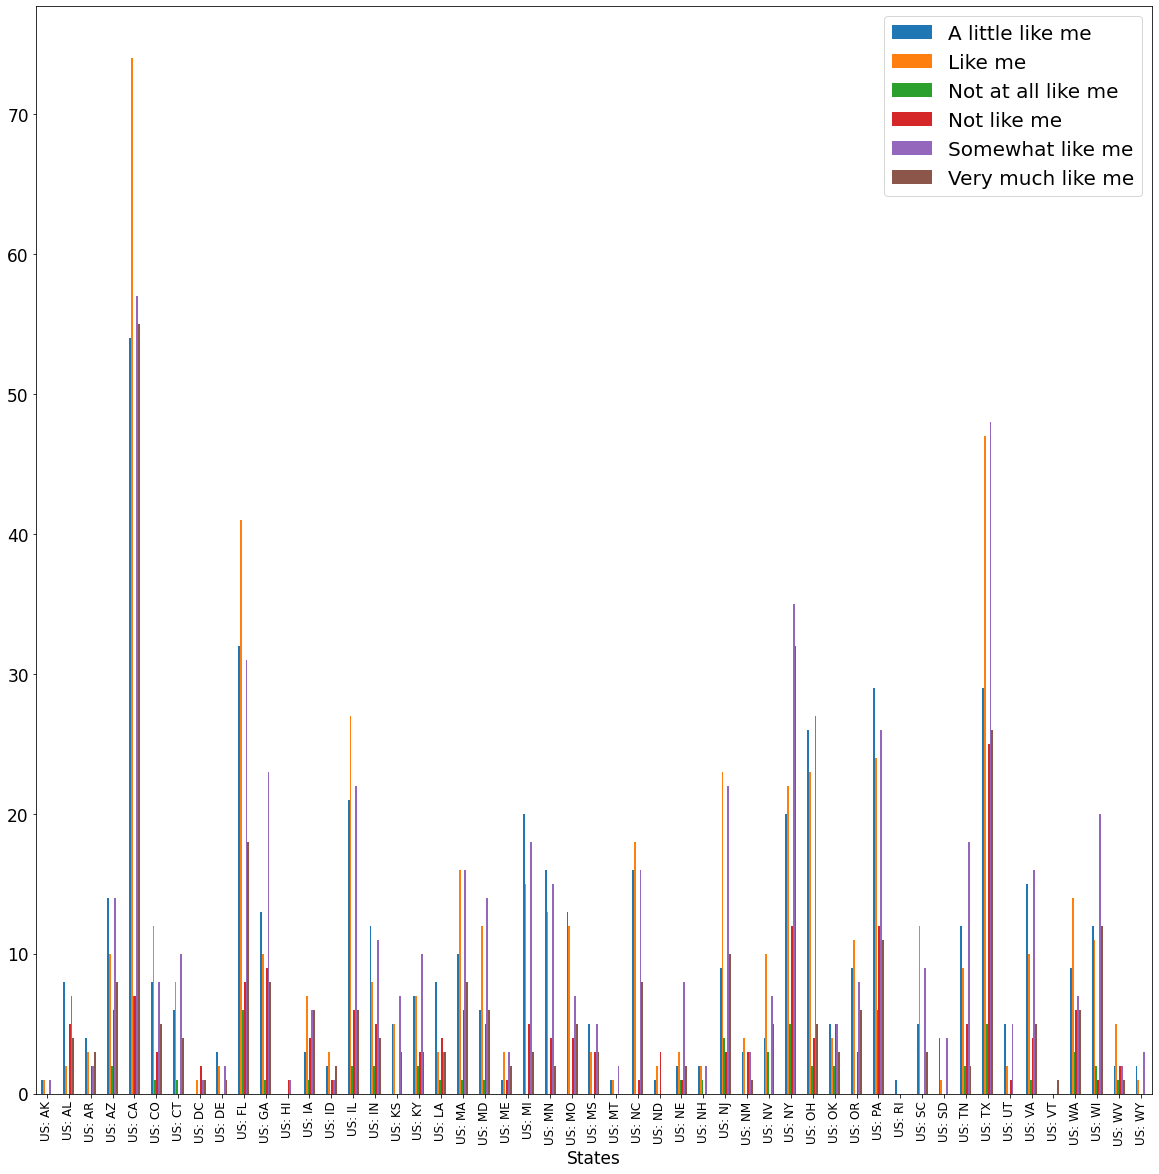

In [86]:
us1.pivot("States", "Looking after the environment", "Number of People").plot(kind='bar', figsize=(20,20));
plt.legend(fontsize=20)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=17)
plt.rcParams['axes.labelsize'] = 17
plt.rcParams['axes.titlesize'] = 17

V80 <br>
Most serious problem of the world <br>
1.- People living in poverty and need <br>
2.- Discrimination against girls and women <br>
3.- Poor sanitation and infectious diseases <br>
4.- Inadequate education <br>
5.- Environmental pollution <br>

In [88]:
us2 = df[df['V256B'].str.contains("US", na=False)]

In [89]:
us2 = us2.groupby(['V256B'])['V80'].value_counts().to_frame()
us2 = us2.rename(columns={'V80': 'column'}).reset_index()
us2 = us2.rename(columns={'V256B': 'States',
                        'V80':'Most serious problem',
                        'column': 'Number of People'})
us2

,States,Most serious problem,Number of People
0,US: AK,Poor sanitation and infectious diseases,2
1,US: AK,Inadequate education,1
2,US: AL,People living in poverty and need,15
3,US: AL,Inadequate education,5
4,US: AL,Poor sanitation and infectious diseases,5
...,...,...,...
211,US: WV,Inadequate education,1
212,US: WY,Inadequate education,2
213,US: WY,Poor sanitation and infectious diseases,2
214,US: WY,Environmental pollution,1


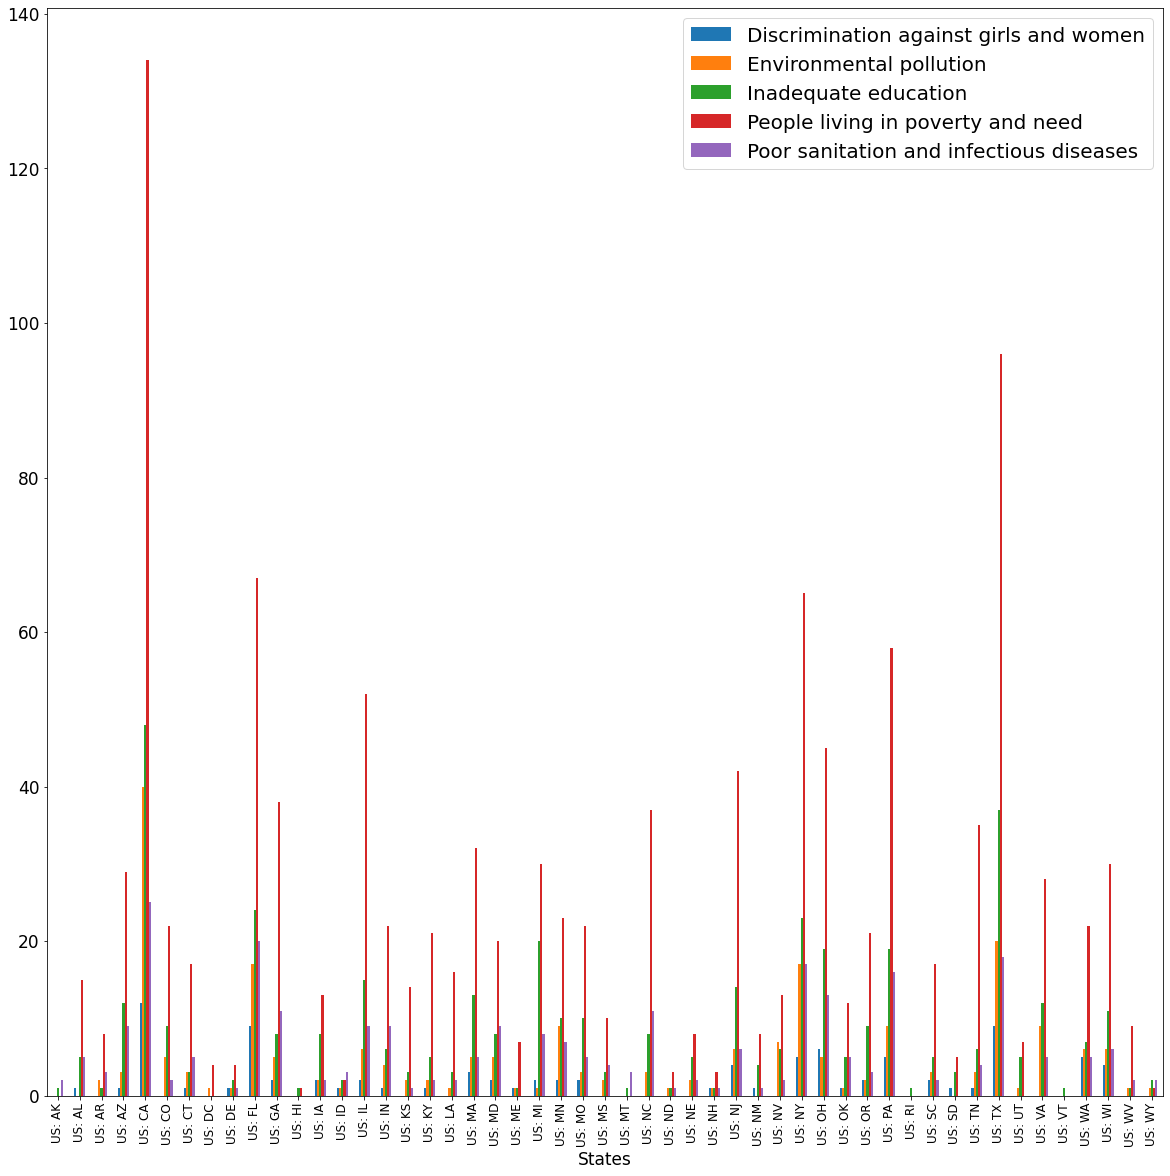

In [90]:
us2.pivot("States", "Most serious problem", "Number of People").plot(kind='bar', figsize=(20,20));
plt.legend(fontsize=20)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=17)
plt.rcParams['axes.labelsize'] = 17
plt.rcParams['axes.titlesize'] = 17

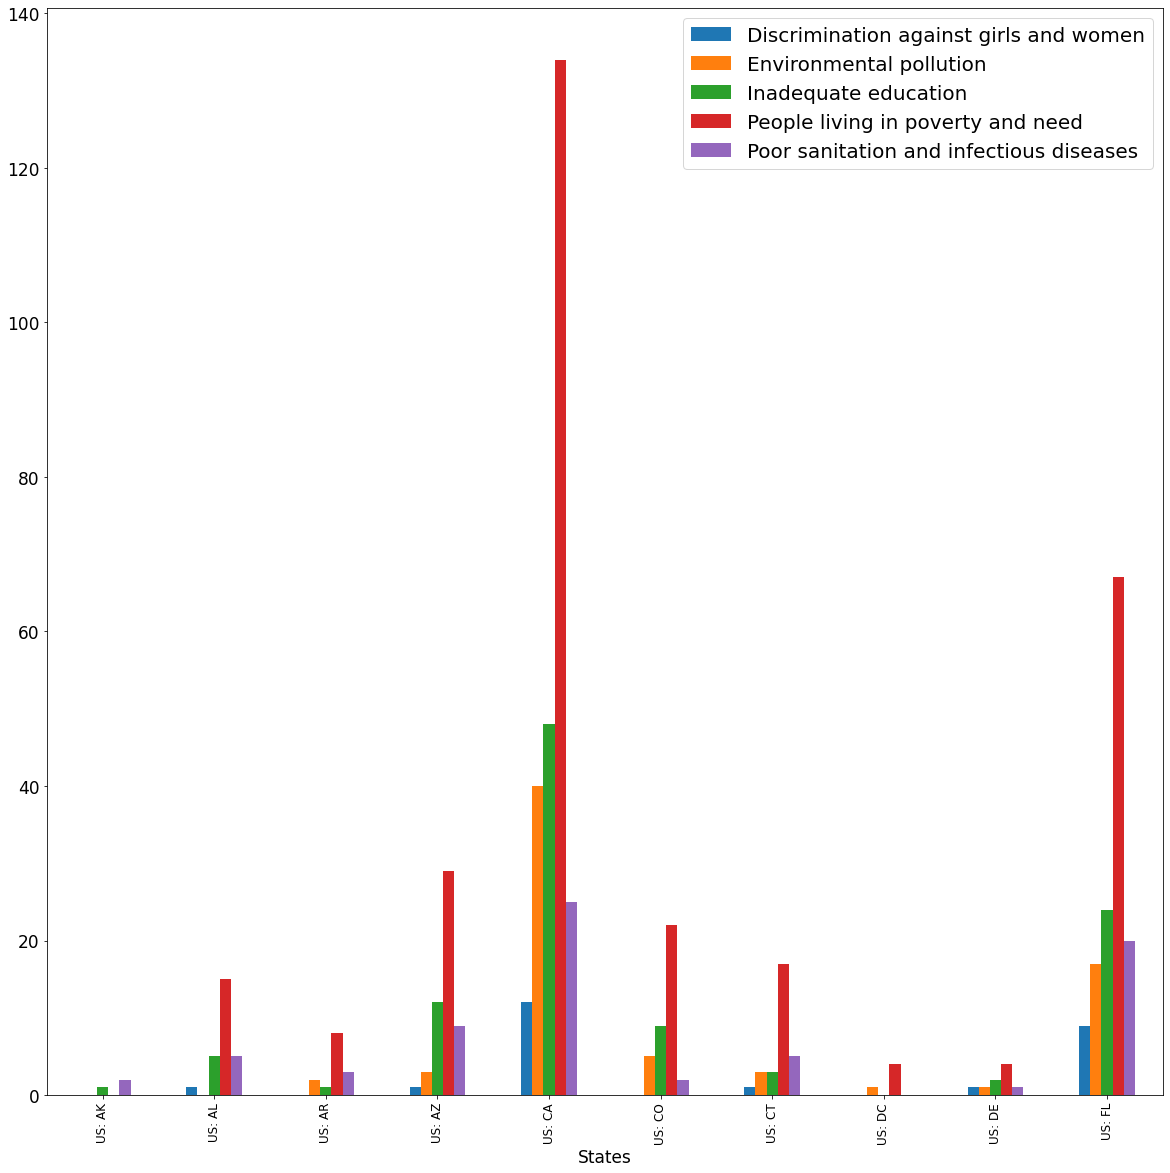

In [91]:
us2.pivot("States", "Most serious problem", "Number of People").head(10).plot(kind='bar', figsize=(20,20));
plt.legend(fontsize=20)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=17)
plt.rcParams['axes.labelsize'] = 17
plt.rcParams['axes.titlesize'] = 17

<strong> Most people think about poverty as the most serious problem. </strong>

V81 <br>
Protecting environment vs. Economic growth <br>
1.- Protecting the environment should be given priority, even if it causes slower economic growth and some loss of jobs <br>
2.- Economic growth and creating jobs should be the top priority, even if the environment suffers to some extent <br>
3.- Other answer

In [92]:
df['V81'].replace(1, '1. Protecting the environment should be given priority, even if it causes slower economic growth and some loss of jobs', inplace = True)
df['V81'].replace(2, '2. Economic growth and creating jobs should be the top priority, even if the environment suffers to some extent', inplace = True)
df['V81'].replace(3, '3. Other answer', inplace = True)
us3 = df[df['V256B'].str.contains("US", na=False)]

In [93]:
us3 = us3.groupby(['V256B'])['V81'].value_counts().to_frame()
us3 = us3.rename(columns={'V81': 'column'}).reset_index()
us3 = us3.rename(columns={'V256B': 'States',
                        'V81':'Protecting environment vs. Economic growth',
                        'column': 'Number of People'})
us3

,States,Protecting environment vs. Economic growth,Number of People
0,US: AK,2. Economic growth and creating jobs should be...,2
1,US: AK,1. Protecting the environment should be given ...,1
2,US: AL,2. Economic growth and creating jobs should be...,19
3,US: AL,1. Protecting the environment should be given ...,7
4,US: AR,1. Protecting the environment should be given ...,7
...,...,...,...
94,US: WI,1. Protecting the environment should be given ...,27
95,US: WV,1. Protecting the environment should be given ...,7
96,US: WV,2. Economic growth and creating jobs should be...,6
97,US: WY,1. Protecting the environment should be given ...,3


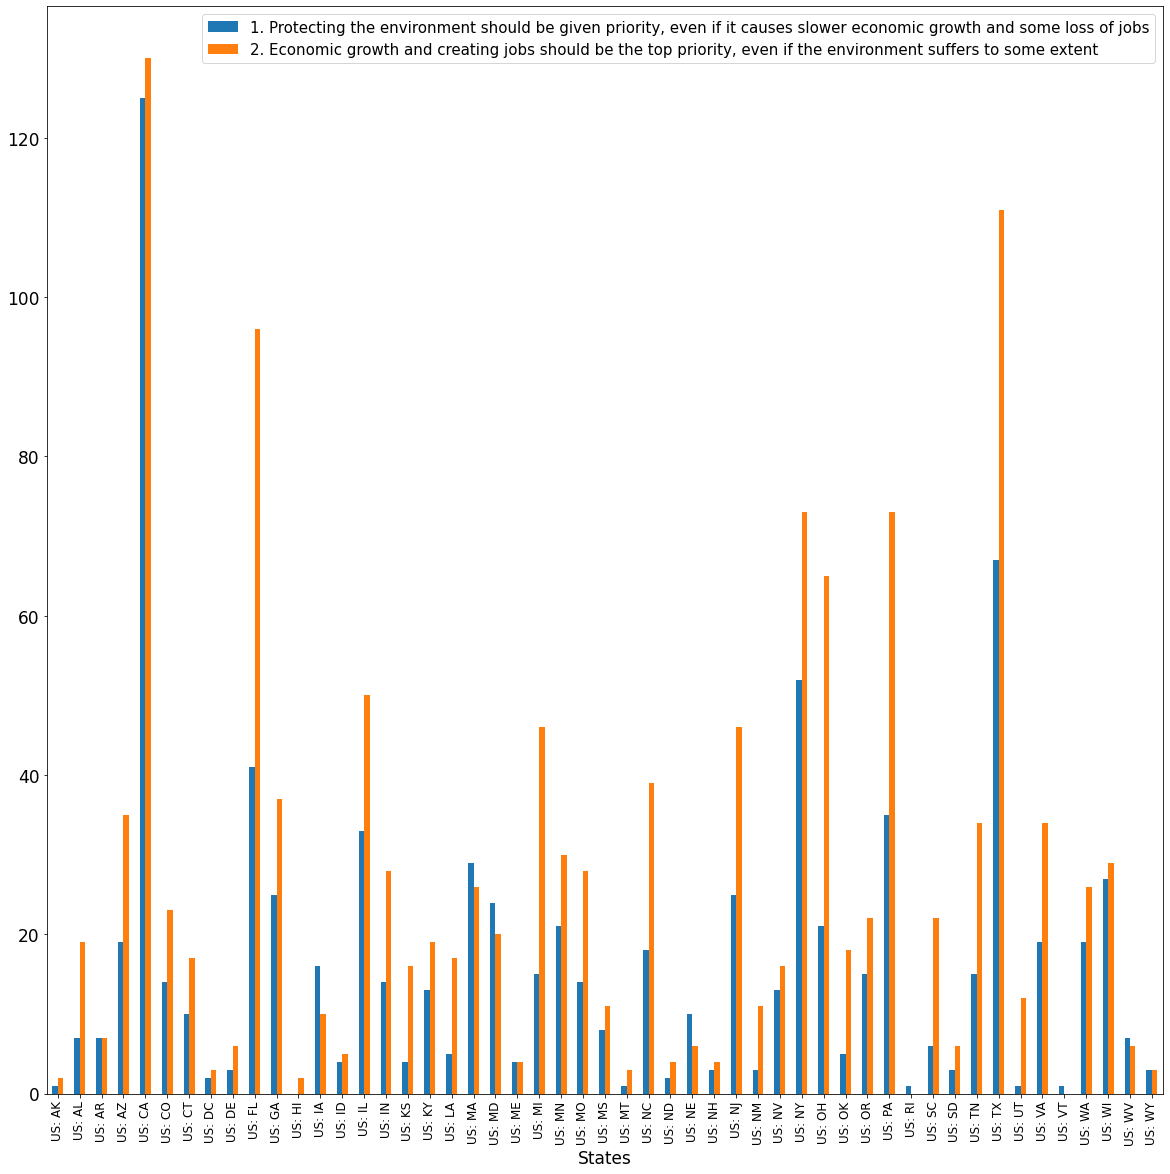

In [94]:
us3.pivot("States", "Protecting environment vs. Economic growth", "Number of People").plot(kind='bar', figsize=(20,20));
plt.legend(fontsize=15)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=17)
plt.rcParams['axes.labelsize'] = 50
plt.rcParams['axes.titlesize'] = 17

### Question 4. Use “SACSECVAL” to answer the following questions. Visualizations are not required for this question. part (a): Insert a column and call it “secular_category”. Populate the values for the new column as following:

In [95]:
df.loc[df['SACSECVAL'] <= 0.3, 'secular_category'] = 'Low' 
df.loc[(0.3 < df['SACSECVAL']) & (df['SACSECVAL'] < 0.7), 'secular_category'] = 'Medium'
df.loc[0.7 <= df['SACSECVAL'], 'secular_category'] = 'High' 

In [96]:
df['secular_category']

0           Low
1           Low
2        Medium
3           Low
4           Low
          ...  
89560       Low
89561       Low
89562       Low
89563       Low
89564       Low
Name: secular_category, Length: 89565, dtype: object

### Question 4. part (b): List the countries where the proportion of respondents in the “Low” secular_category is greater than the “Medium” and “High” categories.

In [97]:
secular = df.groupby(df['V2'])['secular_category'].value_counts().to_frame()
secular = secular.rename(columns={'secular_category': 'column'}).reset_index()
secular = secular.rename(columns={'V2': 'Countries',
                        'column': 'Number of People'})
secular

,Countries,secular_category,Number of People
0,Algeria,Medium,785
1,Algeria,Low,406
2,Algeria,High,9
3,Argentina,Medium,722
4,Argentina,Low,245
...,...,...,...
172,Yemen,Medium,395
173,Yemen,High,7
174,Zimbabwe,Low,789
175,Zimbabwe,Medium,705


In [98]:
Countries = secular.Countries.unique()
Countries 
low_secular = []

for country in Countries:
    section = secular.loc[secular.Countries == country]
    low = section.loc[section['secular_category'] == 'Low']['Number of People'].values
    medium = section.loc[section['secular_category'] == 'Medium']['Number of People'].values
    high = section.loc[section['secular_category'] == 'High']['Number of People'].values
    if low.size !=0 and medium.size != 0 and high.size != 0:
        if medium < low and high < low :
            low_secular.append(country)
            
print(low_secular)

['Armenia', 'Cyprus', 'Georgia', 'India', 'Kuwait', 'Libya', 'Malaysia', 'Morocco', 'Pakistan', 'Romania', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Uzbekistan', 'Yemen', 'Zimbabwe']


<strong> Above shows a list of Countries with higher 'Low' secular values than 'high' and 'medium' </strong>

### Question 4. part (c): Check if there are differences in the distribution of respondents in the secular_category across different continents in the world. Use the given country-continent.csv file to do this.

In [99]:
#loading the new dataset
continets = pd.read_csv('country_continent_dictionary.csv')
continets.head()

,Country,Continent
0,Algeria,Africa
1,Argentina,South America
2,Armenia,Europe
3,Australia,Oceana
4,Azerbaijan,Asia


In [100]:
#merging the new data with our data
df_total = pd.merge(df, continets, left_on = 'V2', right_on = 'Country', how = 'outer')
df_total.head()

,V1,V2,V2A,V3,V4,V5,V6,V7,V8,V9,...,S021,S024,S025,COW,missing,missing_number,missing_over_5,secular_category,Country,Continent
0,2010-2013,Algeria,Algeria,1,1.0,1.0,1.0,NaN,1.0,1.0,...,1206212014,Algeria (6),Algeria (2014),ALG Algeria,True,77,1,Low,Algeria,Africa
1,2010-2013,Algeria,Algeria,2,1.0,2.0,3.0,4.0,2.0,2.0,...,1206212014,Algeria (6),Algeria (2014),ALG Algeria,True,77,1,Low,Algeria,Africa
2,2010-2013,Algeria,Algeria,3,1.0,3.0,2.0,4.0,2.0,1.0,...,1206212014,Algeria (6),Algeria (2014),ALG Algeria,True,62,1,Medium,Algeria,Africa
3,2010-2013,Algeria,Algeria,4,1.0,1.0,3.0,4.0,3.0,1.0,...,1206212014,Algeria (6),Algeria (2014),ALG Algeria,True,66,1,Low,Algeria,Africa
4,2010-2013,Algeria,Algeria,5,1.0,1.0,1.0,2.0,1.0,1.0,...,1206212014,Algeria (6),Algeria (2014),ALG Algeria,True,63,1,Low,Algeria,Africa


In [101]:
# grouping the total data based on continents
df_total.groupby(df_total['Continent'])['secular_category'].value_counts()

Continent      secular_category
Africa         Medium               8614
               Low                  8359
               High                  155
Asia           Medium              18496
               Low                 15856
               High                  749
Europe         Medium              13413
               Low                  6210
               High                 1031
North America  Medium               4467
               Low                  2646
               High                  114
Oceana         Medium               1467
               Low                   772
               High                   79
South America  Medium               5128
               Low                  3111
               High                  201
Name: secular_category, dtype: int64

### Question 5: Based on this dataset, come up with an investigative idea of your own. Briefly explain why you find this question interesting (bullet points would do). Use data wrangling techniques to examine the data and answer your question. Illustrate with effective visualizations.

<strong> 1. I always believed hardwork is the path to sucess, but I am curious to see what other people think. particulary in different continets. So, Let's explore the attitude on people of different continents toward hardwork. </strong><br>
<br>
Hard work brings success <br>
1.- In the long run, hard work usually brings a better life <br>
2.- 2 <br>
3.- 3 <br>
4.- 4 <br>
5.- 5 <br>
6.- 6 <br>
7.- 7 <br>
8.- 8 <br>
9.- 9 <br>
10.- Hard work doesn´t generally bring success - it´s more a matter of luck and connections <br>

In [102]:
hardwork = df_total.groupby(df_total['Continent'])['V100'].mean()
hardwork = hardwork.to_frame().rename(columns={'V100': 'Mean of the responses'}).reset_index()
hardwork

,Continent,Mean of the responses
0,Africa,3.746369
1,Asia,4.013474
2,Europe,4.598241
3,North America,4.818566
4,Oceana,3.691659
5,South America,4.402332


North America think more negatively about hard work comparing to other continets. While oceana and africa has the most positive attitude. 

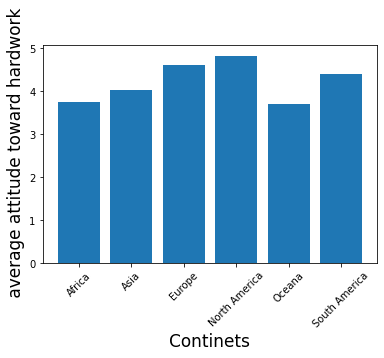

In [120]:
plt.bar(hardwork['Continent'], hardwork['Mean of the responses'])
plt.xticks(rotation = 45)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.xlabel('Continets')
plt.ylabel(' average attitude toward hardwork');

<strong> Another question that I chosed for this section is below:</strong> <br>
V55 - How much freedom of choice and control over own life <br>
1.- No choice at all <br>
2.- 2 <br>
3.- 3 <br>
4.- 4 <br>
5.- 5 <br>
6.- 6 <br>
7.- 7 <br>
8.- 8 <br>
9.- 9 <br>
10.- A great deal of choice <br>

In [104]:
choice = df_total.groupby(df_total['Continent'])['V55'].mean()
choice = choice.to_frame().rename(columns={'V55': 'Freedom of choice'}).reset_index()
choice

,Continent,Freedom of choice
0,Africa,7.108115
1,Asia,7.214203
2,Europe,6.991688
3,North America,7.766244
4,Oceana,7.873002
5,South America,7.766395


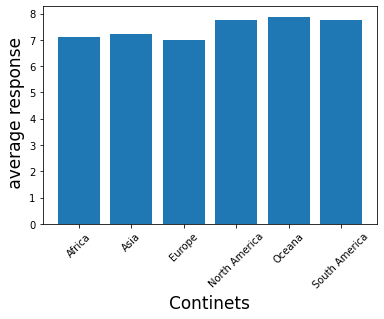

In [121]:
plt.bar(choice['Continent'], choice['Freedom of choice'])
plt.xticks(rotation = 45)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.xlabel('Continets')
plt.ylabel(' average response');

2. <strong> I don't believe in war and I think going to war for any reason is a type of suicide but I am curious what the people of different countries think.</strong> <br>
V66 <br>
Willingness to fight for your country <br>
1.- Yes <br>
2.- No <br>

In [106]:
fight = df_total.groupby(df_total['V2'])['V66'].value_counts(normalize=True)*100
fight = fight.to_frame().rename(columns={'V66': 'Number of People'}).reset_index()
fight = fight.rename(columns={'V2': 'Countries',
                      'V66': 'Willingness to fight'})
fight

,Countries,Willingness to fight,Number of People
0,Algeria,1.0,83.317073
1,Algeria,2.0,16.682927
2,Argentina,2.0,55.604396
3,Argentina,1.0,44.395604
4,Armenia,1.0,76.230366
...,...,...,...
115,Uzbekistan,2.0,6.391270
116,Yemen,1.0,77.157360
117,Yemen,2.0,22.842640
118,Zimbabwe,1.0,53.000000


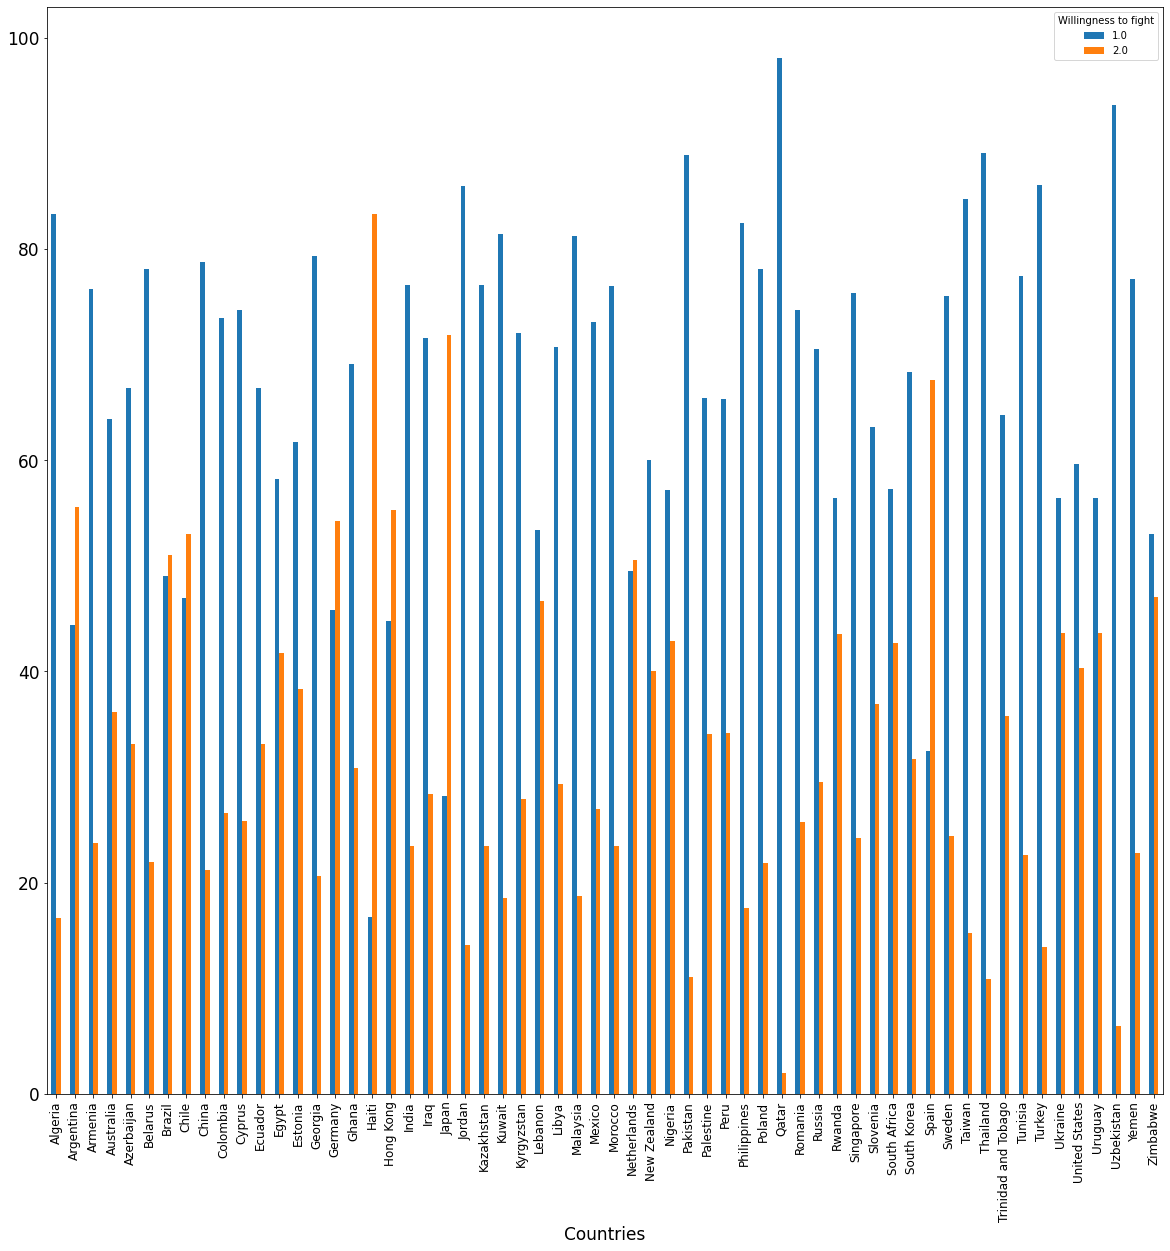

In [122]:
fight.pivot("Countries", "Willingness to fight", "Number of People").plot(kind='bar', figsize=(20,20));
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=17)
plt.rcParams['axes.labelsize'] = 17
plt.rcParams['axes.titlesize'] = 17

<strong> 3. Let's go deep to women right section and do an exploratory data analysis in this section. </strong>
V52 A university education is more important for a boy than for a girl <br>
1.- Agree strongly <br>
2.- Agree <br>
3.- Disagree <br>
4.- Strongly disagree <br>

In [108]:
df_total['V52'].replace(1, 'Agree Strongly', inplace = True)
df_total['V52'].replace(2, 'Agree', inplace = True)
df_total['V52'].replace(3, 'Disagree', inplace = True)
df_total['V52'].replace(4, 'Strongly disagree', inplace = True)
university = df_total.groupby(df_total['V240'])['V52'].value_counts()
university = university.to_frame().rename(columns={'V52': 'University Degree',
                                                  'V240' : 'Gender'}).reset_index()
university

,V240,V52,University Degree
0,F,Disagree,19966
1,F,Strongly disagree,16122
2,F,Agree,5992
3,F,Agree Strongly,3789
4,M,Disagree,18749
5,M,Strongly disagree,10608
6,M,Agree,7112
7,M,Agree Strongly,5758


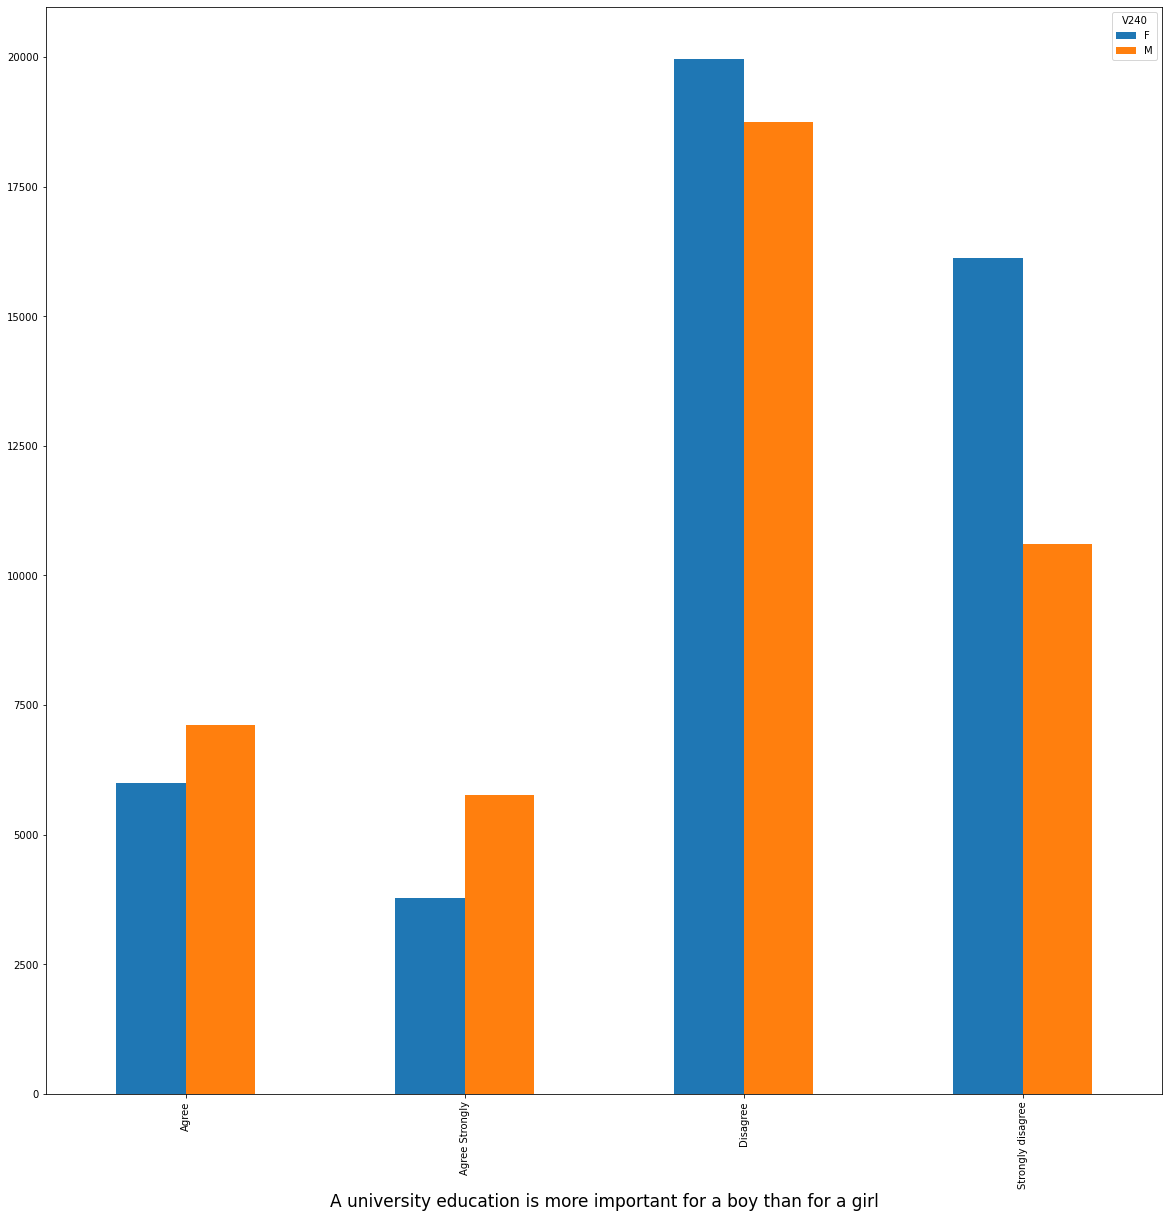

In [109]:
university.pivot("V52", "V240", "University Degree").plot(kind='bar', figsize=(20,20))
plt.xlabel('A university education is more important for a boy than for a girl');

More men think a university degree is only for men! (not a surprise!)

v50 -When a mother works for pay, the children suffer<br>
1.- Agree strongly <br>
2.- Agree <br>
3.- Disagree <br>
4.- Strongly disagree<br>

In [110]:
df_total['V50'].replace(1, '1. Agree Strongly', inplace = True)
df_total['V50'].replace(2, '2. Agree', inplace = True)
df_total['V50'].replace(3, '3. Disagree', inplace = True)
df_total['V50'].replace(4, '4. Strongly disagree', inplace = True)
mother = df_total.groupby(df_total['V240'])['V50'].value_counts()
mother = mother.to_frame().rename(columns={'V50': 'worker mother'}).reset_index()
mother

,V240,V50,worker mother
0,F,3. Disagree,18144
1,F,2. Agree,13544
2,F,1. Agree Strongly,7071
3,F,4. Strongly disagree,6350
4,M,3. Disagree,15869
5,M,2. Agree,13337
6,M,1. Agree Strongly,7688
7,M,4. Strongly disagree,4625


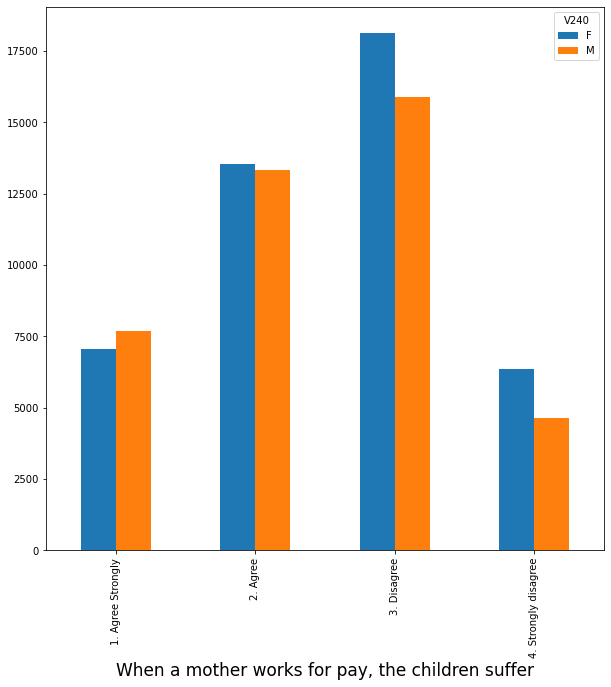

In [111]:
mother.pivot("V50", "V240", "worker mother").plot(kind='bar', figsize=(10,10))
plt.xlabel('When a mother works for pay, the children suffer');

more women disagree with this statement.

V48 Having a job is the best way for a woman to be an independent person. <br>
1.- Agree <br>
2.- Neither <br>
3.- Disagree <br>

In [112]:
df_total['V48'].replace(1, '1. Agree', inplace = True)
df_total['V48'].replace(2, '2. Neither', inplace = True)
df_total['V48'].replace(3, '3. Disagree', inplace = True)
independent = df_total.groupby(df_total['V240'])['V48'].value_counts()
independent = independent.to_frame().rename(columns={'V48': 'independent'}).reset_index()
independent

,V240,V48,independent
0,F,1. Agree,29216
1,F,2. Neither,9348
2,F,3. Disagree,7276
3,M,1. Agree,21247
4,M,2. Neither,11159
5,M,3. Disagree,9443


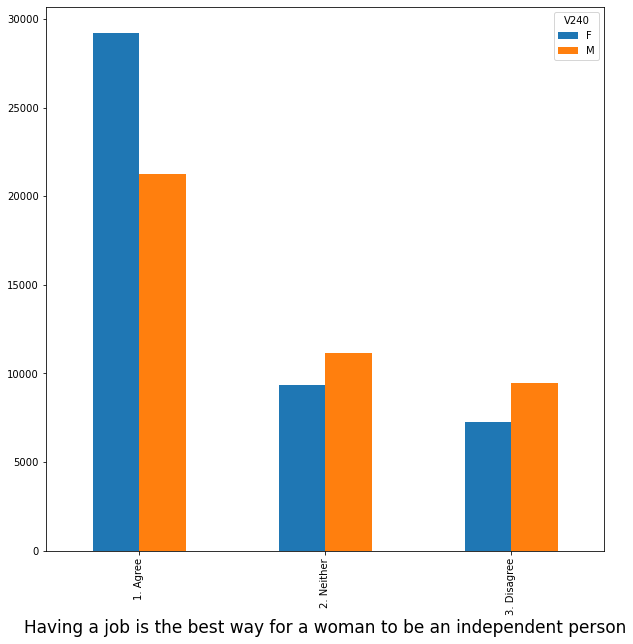

In [113]:
independent.pivot("V48", "V240", "independent").plot(kind='bar', figsize=(10,10))
plt.xlabel('Having a job is the best way for a woman to be an independent person');

V47 - If a woman earns more money than her husband, it's almost certain to cause problems <br>
1.- Agree <br>
2.- Neither <br>
3.- Disagree <br>

In [114]:
df_total['V47'].replace(1, '1. Agree', inplace = True)
df_total['V47'].replace(2, '2. Neither', inplace = True)
df_total['V47'].replace(3, '3. Disagree', inplace = True)
husband = df_total.groupby(df_total['V240'])['V47'].value_counts()
husband = husband.to_frame().rename(columns={'V47': 'husband'}).reset_index()
husband

,V240,V47,husband
0,F,3. Disagree,19189
1,F,1. Agree,13634
2,F,2. Neither,12466
3,M,3. Disagree,16543
4,M,1. Agree,13740
5,M,2. Neither,11632


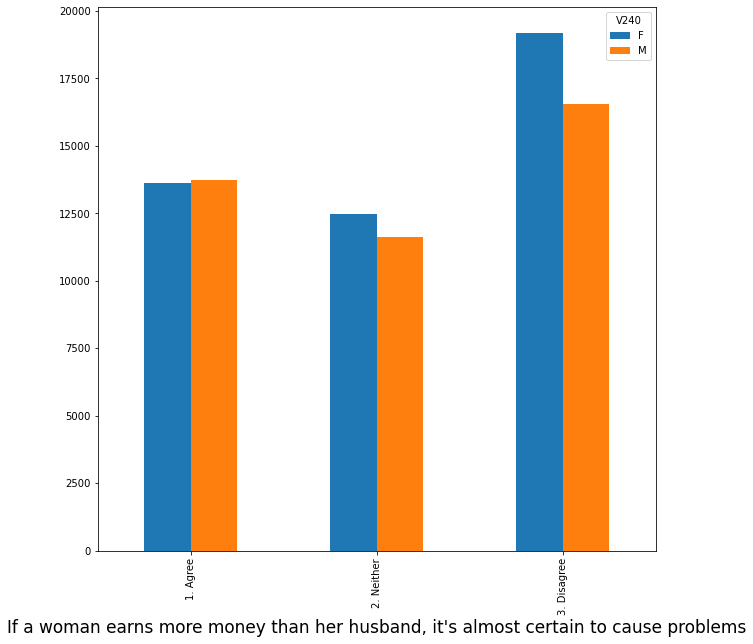

In [115]:
husband.pivot("V47", "V240", "husband").plot(kind='bar', figsize=(10,10))
plt.xlabel('If a woman earns more money than her husband, it\'s almost certain to cause problems');

V45 - When jobs are scarce, men should have more right to a job than women <br>
1.- Agree <br>
2.- Neither <br>
3.- Disagree <br>

In [116]:
df_total['V45'].replace(1, '1. Agree', inplace = True)
df_total['V45'].replace(2, '2. Neither', inplace = True)
df_total['V45'].replace(3, '3. Disagree', inplace = True)
men = df_total.groupby(df_total['V240'])['V45'].value_counts()
men = men.to_frame().rename(columns={'V45': 'men'}).reset_index()
men

,V240,V45,men
0,F,3. Disagree,22340
1,F,1. Agree,15545
2,F,2. Neither,8365
3,M,1. Agree,19613
4,M,3. Disagree,14825
5,M,2. Neither,8412


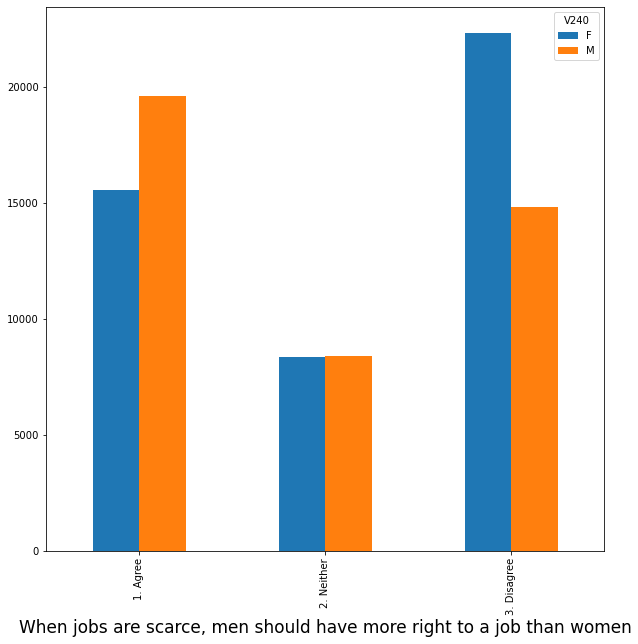

In [117]:
men.pivot("V45", "V240", "men").plot(kind='bar', figsize=(10,10))
plt.xlabel('When jobs are scarce, men should have more right to a job than women');

V54 Being a housewife is just as fulfilling as working for pay <br>
1.- Agree strongly <br>
2.- Agree <br>
3.- Disagree <br>
4.- Strongly disagree <br>

In [118]:
df_total['V54'].replace(1, '1. Agree Strongly', inplace = True)
df_total['V54'].replace(2, '2. Agree', inplace = True)
df_total['V54'].replace(3, '3. Disagree', inplace = True)
df_total['V54'].replace(4, '4. Strongly disagree', inplace = True)
housewife = df_total.groupby(df_total['V240'])['V54'].value_counts()
housewife = housewife.to_frame().rename(columns={'V54': 'house wife'}).reset_index()
housewife

,V240,V54,house wife
0,F,2. Agree,16443
1,F,3. Disagree,12109
2,F,1. Agree Strongly,11819
3,F,4. Strongly disagree,4929
4,M,2. Agree,16402
5,M,3. Disagree,10659
6,M,1. Agree Strongly,10083
7,M,4. Strongly disagree,3537


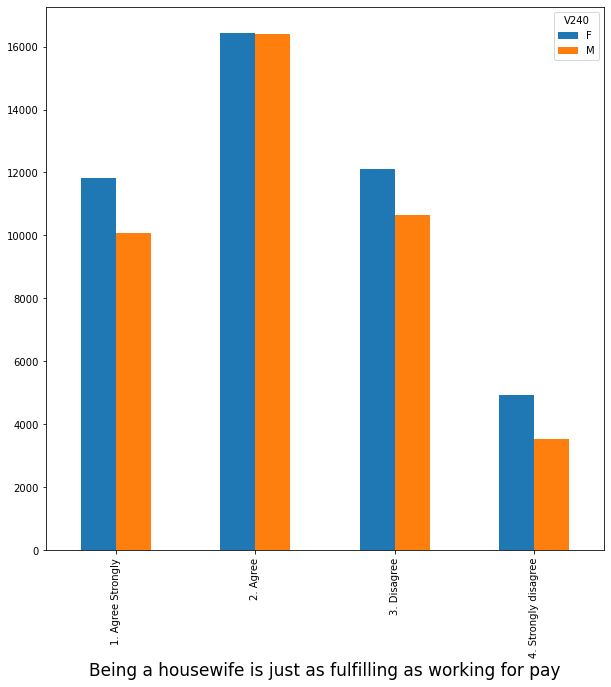

In [119]:
housewife.pivot("V54", "V240", "house wife").plot(kind='bar', figsize=(10,10))
plt.xlabel('Being a housewife is just as fulfilling as working for pay');